<a href="https://colab.research.google.com/github/vithika-karan/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction_Vithika_Karan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Email Campaign Effectiveness Prediction**


##**Problem Description**

Most of the small to medium business owners are making effective use of Gmail-based
Email marketing Strategies for offline targeting of converting their prospective customers into
leads so that they stay with them in business.
The main objective is to create a machine learning model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.
Data columns are self-explanatory.

##**Introduction:**
Email Marketing can be defined as a marketing technique in which businesses stay connected with their customers through emails, making them aware about their new products, updates, important notices related to the products they are using.

Most importantly, email marketing allows businesses to build relationships with leads, new customers and past customers. It's a way to communicate directly to the customers in their inbox, at a time that is convenient for them. With the right messaging tone and strategies, emails are one of the most important marketing channels.

We all subscribe to many different kinds of businesses through emails because it's required to do so, sometimes to get digital receipts of the things we bought or to get digital information about the business to stay updated. But many of times we do not tend to read an email due to a number of reasons - to name a few would be- no proper structure, too many images, too many links inside the mail, complex vocabulary used or simply too long emails.

In this problem statement, we will be trying to create machine learning models that characterize and predict whether the mail is ignored, read or acknowledged by the reader. In addition to this, we will be trying to analyze and find all the features that are important for an email to not get ignored.

So let's begin!


In [67]:
#Importing important libraries and modules
#for data reading and manipulation
import pandas as pd
import numpy as np

#for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modelling
#Train-Test Split
from sklearn.model_selection import train_test_split
#Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

#to ignore warnings
import warnings    
warnings.filterwarnings('ignore')

In [68]:
#reading the csv dataset
df_orig = pd.read_csv("/content/drive/MyDrive/ALMABETTER/CAPSTONE PROJECTS/Email Campaign Effectiveness Prediction - Vithika Karan/Copy of data_email_campaign.csv")

In [69]:
#first look of our dataset
df_orig.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [70]:
#basic info about our data
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


##Data Summary:
Our email campaign dataset have 68353 observations and 12 features. Clearly Email_Status is our target variable.

Our features:
* **Email Id** - It contains the email id's of the customers/individuals
* **Email Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.
* **Subject Hotness Score** - It is the email's subject's score on the basis of how good and effective the content is.
* **Email Source** - It represents the source of the email like sales and marketing or important admin mails related to the product.
* **Email Campaign Type** - The campaign type of the email.
* **Total Past Communications** - This column contains the total previous mails from the same source, the number of communications had.
* **Customer Location** - Contains demographical data of the customer, the location where the customer resides.
* **Time Email sent Category** - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.
* **Word Count** - The number of words contained in the email.
* **Total links** - Number of links in the email.
* **Total Images** - Number of images in the email.
* **Email Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader.

##**Data Cleaning and PreProcessing:**

When we have raw data, it may contain missing values, NaN values or absurd values. It is necessary to check and handle these values before feeding it to the models, so as to obtain good insights on what the data is trying to say and make great characterisation and prediction which will in turn help improve the business's content. 

In [71]:
#get the num of nulls in each column
df_orig.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

We have a lot of nulls in the following columns:
* Customer Location
* Total Past Communications
* Total Links
* Total Images


But particularly customer location has a lot of them. Since it is a categorical column and it is difficult to just impute them with our understanding of where the customer's location is, we'll see how much it affects our target variable, whether a particular location has anything to do with it or it is not correlated at all and accordingly we can decide on it later on.
Let's fill up the null values in other columns.

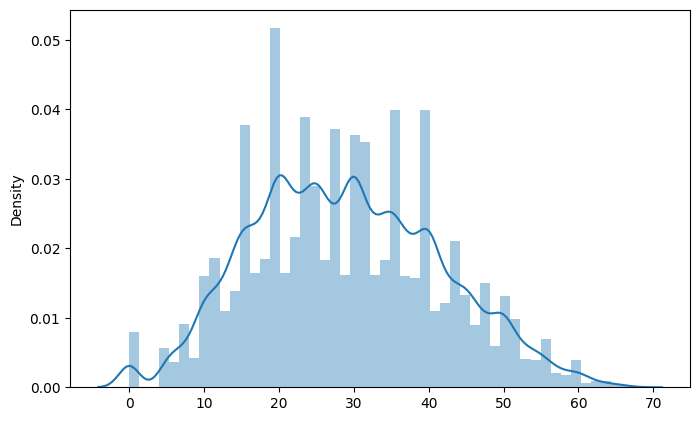

In [72]:
#let's see the distribution of Total Past Communications to get what majority of the data tends to so that we can fill it accordingly
sns.distplot(x=df_orig['Total_Past_Communications'], hist = True)

We have kind of a normal ditribution for Total Past Communications and it will be fine, if we use mean to fill up the null values of this column.

In [73]:
#filling up the null values for total past comm
df_orig['Total_Past_Communications'].fillna(df_orig['Total_Past_Communications'].mean(), inplace = True)

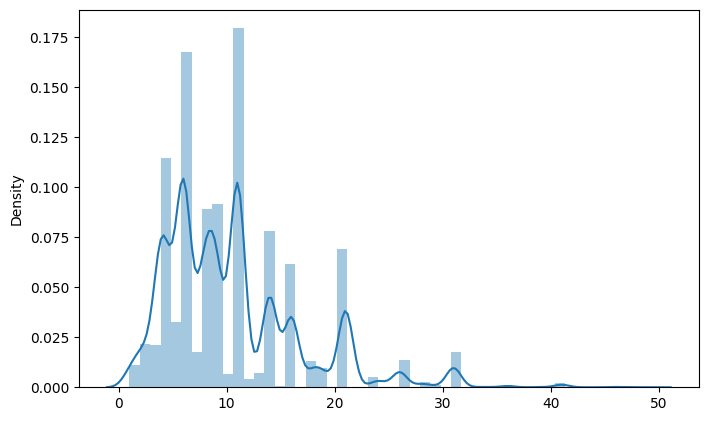

In [74]:
#let's see the distribution of Total Links to get what majority of the data tends to so that we can fill it accordingly
sns.distplot(x=df_orig['Total_Links'], hist= True)

It seems like most of the values of the Total Links in the column are between 0-10 and the distribution is skewed on the right. Mode is more robust to outlier effect.

In [75]:
#filling up the Total Links Column
df_orig['Total_Links'].fillna(df_orig['Total_Links'].mode()[0], inplace = True)

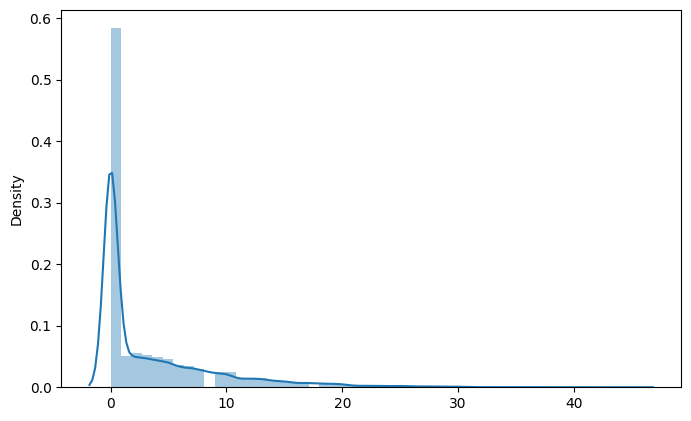

In [76]:
#total image distribution
sns.distplot(x=df_orig['Total_Images'], hist=True)

The number of images in most of the emails seems to be 0 or fewer than 3-4. It would be wise to fill the null values with mode values.

In [77]:
#filling up the Total Images Column
df_orig['Total_Images'].fillna(df_orig['Total_Images'].mode()[0], inplace = True)

In [78]:
#check for duplicates
df_orig.duplicated().sum()

0

##**Exploratory Data Analysis**:


Exploratory data analysis is an important part of data analysis. It involves exploring and analyzing the dataset given to find out patterns, trends and conclusions to take better decisions related to the data. In this section, we will be trying to obtain those features which help our emails not get ignored.

We will explore every feature against our target variable and analyze it's influence on it.

####Categorical Variables:
We have six categorical variables Email Type, Email Source, Email Campaign Type, Time Email sent Category, Customer Location and Email Status. We should keep in mind that we have a lot of null values in Customer Location feature and after analysing it's influence on our target variable, we will fill it accordingly or remove it. If a particular location is influencing our target variables and aiding in to getting it ignored or otherwise, it should be filled on a condition (on Email Status) row wise.

####Continuous Variables:
Our continuous variables include Subject Hotness Score, Total Past Communications, Word Count, Total Links and Total Images. 

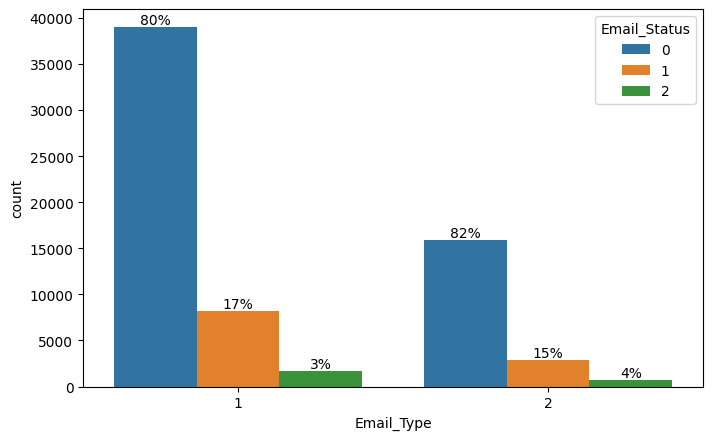

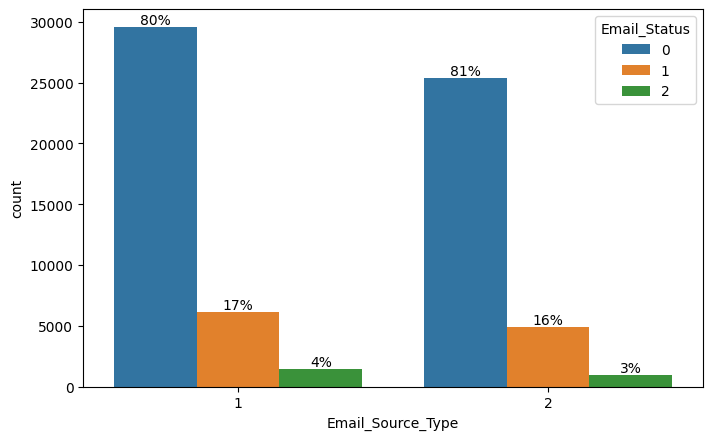

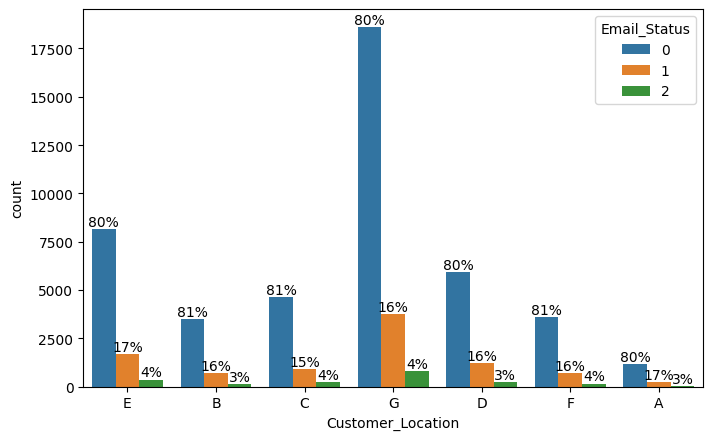

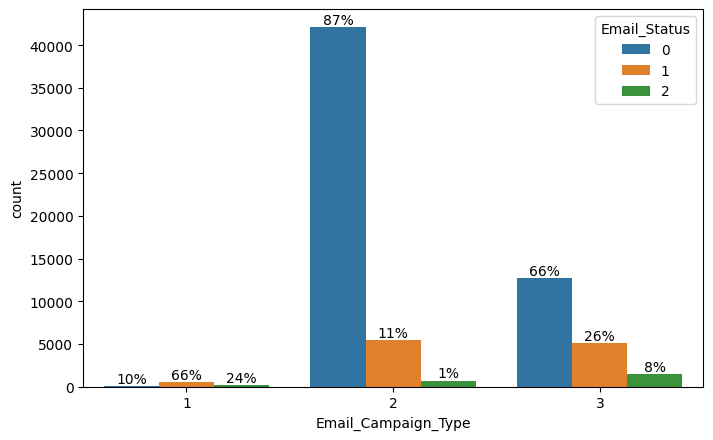

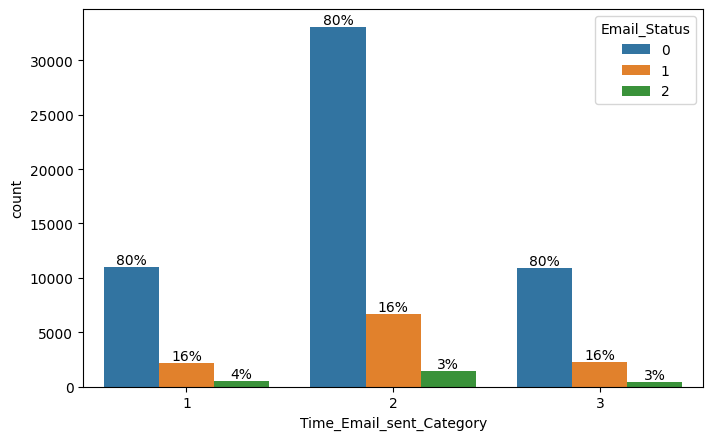

In [79]:
#starting with categorical variables
categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
Target_var = ['Email_Status']

for i,value in enumerate(categorical_variables):
  ax = sns.countplot(x=df_orig[value], hue=df_orig[Target_var[0]])
  unique = len([x for x in df_orig[value].unique() if x==x])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  plt.show()
              

**Observation:** 

* The email type 1 which may be considered as promotional emails are sent more than email type 2 and hence are read and acknowledged more than the other type otherwise the proportion of ignored, read, acknowledged emails are kind of same in both email types.

* Email source type shows kind of a similar pattern for both the categories.

* In the customer location feature we can find that irrespective of the location, the percentage ratio of emails being ignored, read and acknowledge are kind of similar. It does not exclusively influence our target variable. It would be better to not consider location as factor in people ignoring, reading or acknowledging our emails. Other factors should be responsible in why people are ignoring the emails not location.

* In the Email Campaign Type feature, it seems like in campaign type 1 very few emails were sent but has a very high likelihood of getting read. Most emails were sent under email campaign type 2 and most ignored. Seems like campaign 3 was a success as even when less number of emails were sent under campaign 3, more emails were read and acknowledged.

* If we consider 1 annd 3 as morning and night category in time email sent feature, it is obvious to think 2 as middle of the day and as expected there were more emails sent under 2nd category than either of the others, sending emails in the middle of the day could lead to reading and opening the email as people are generally working at that time and they frequently checkup their emails, but it cannot be considered as the major factor in leading to acknowledged emails.




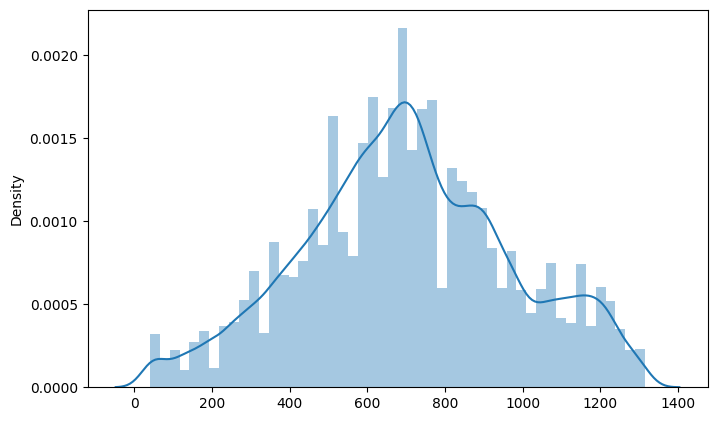

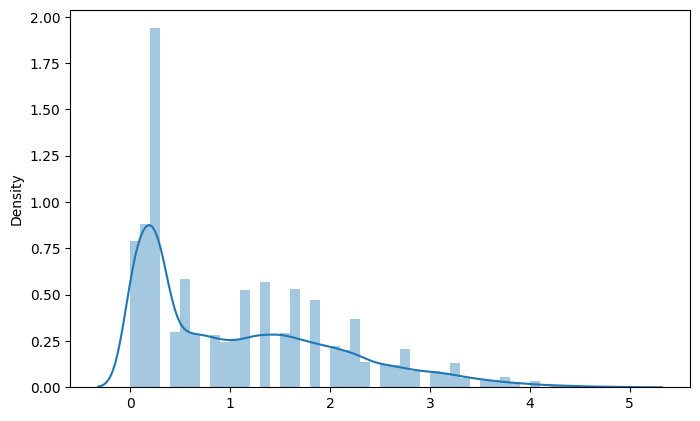

In [80]:
#continuous variables
#distribution of other continuous features and understanding where the data tends to
cont_var = ['Word_Count','Subject_Hotness_Score']
for i, value in enumerate(cont_var):
 sns.distplot(x=df_orig[value], hist = True)
 plt.show()

We already saw the distribution plots of Total Links, Total Images and Total Past Communications earlier. Here we see that Word Count just as Total Past Communications has a normal distribution. All of the rest are rightly skewed which indicates the presence of outliers.

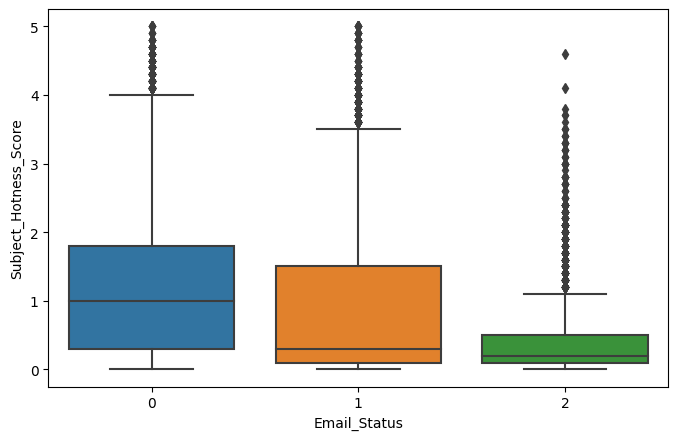

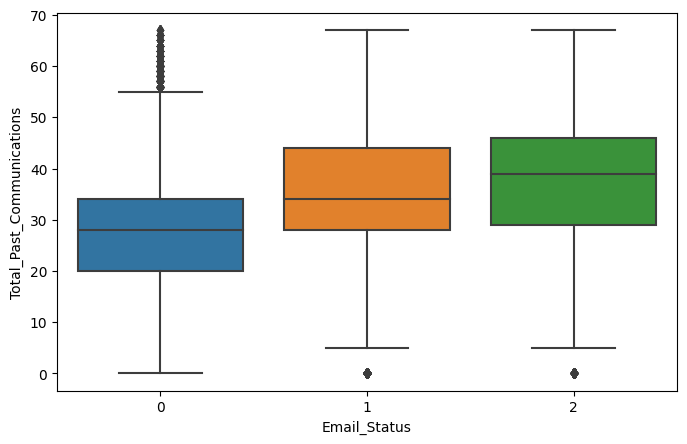

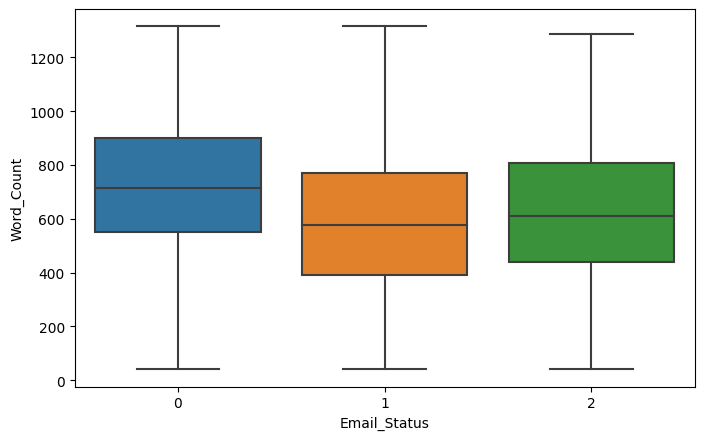

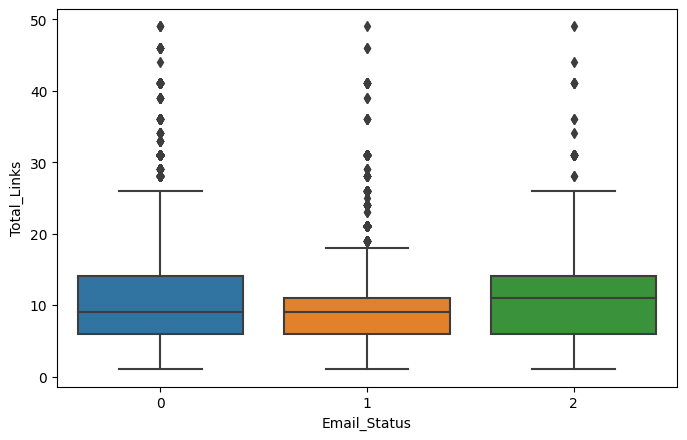

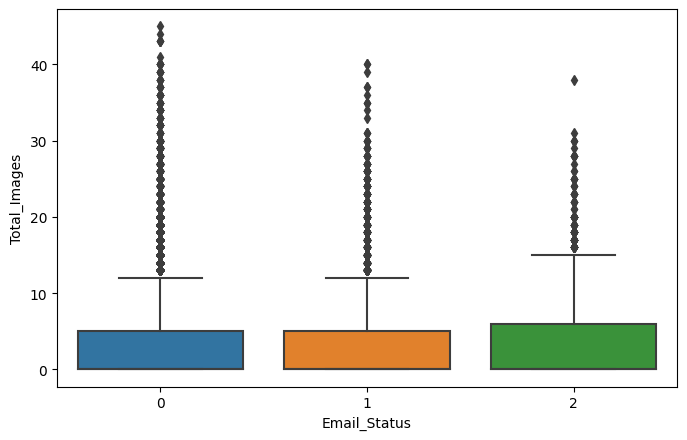

In [81]:
#continuous variables through boxplots
cont_var = ['Subject_Hotness_Score', 'Total_Past_Communications','Word_Count','Total_Links','Total_Images']
for i, value in enumerate(cont_var):
 sns.boxplot(x=df_orig['Email_Status'], y= df_orig[value])
 plt.show()


**Observation:**

* In the subject hotness score, median of ignored emails was around 1 with a few outliers. Acknowledged emails has the most outliers. It is observed that the Subject_Hotness_Score for read and acknowledged emails are much lower.


* Analyzing total past communications, we can see that the more the number of previous emails, the more it leads to read and acknowledged emails. This is just about making connection with your customers.

* The more the words in an email, the more it has a tendency to get ignored. Too lengthy emails are getting ignored.

* The median is kind of similar in all of the three cases in total links feature with a number of outliers.

* More images were there in ignored emails.

* There are considerable number of outliers in Subject_Hotness_Score, Total_Links and Total_Images.

**Correlation:**
To get an understanding of how much correlated, positively or negatively our features is with our target variable, we will be creating a correlation matrix.

We will be removing Customer location and Email Id features. They will not contribute in deciding whether a customer will ignore, read, acknowledge the email.
Let's get to it.



In [82]:
#dropping columns
columns_to_drop = ['Email_ID','Customer_Location']
df = df_orig.drop(columns_to_drop,axis=1)

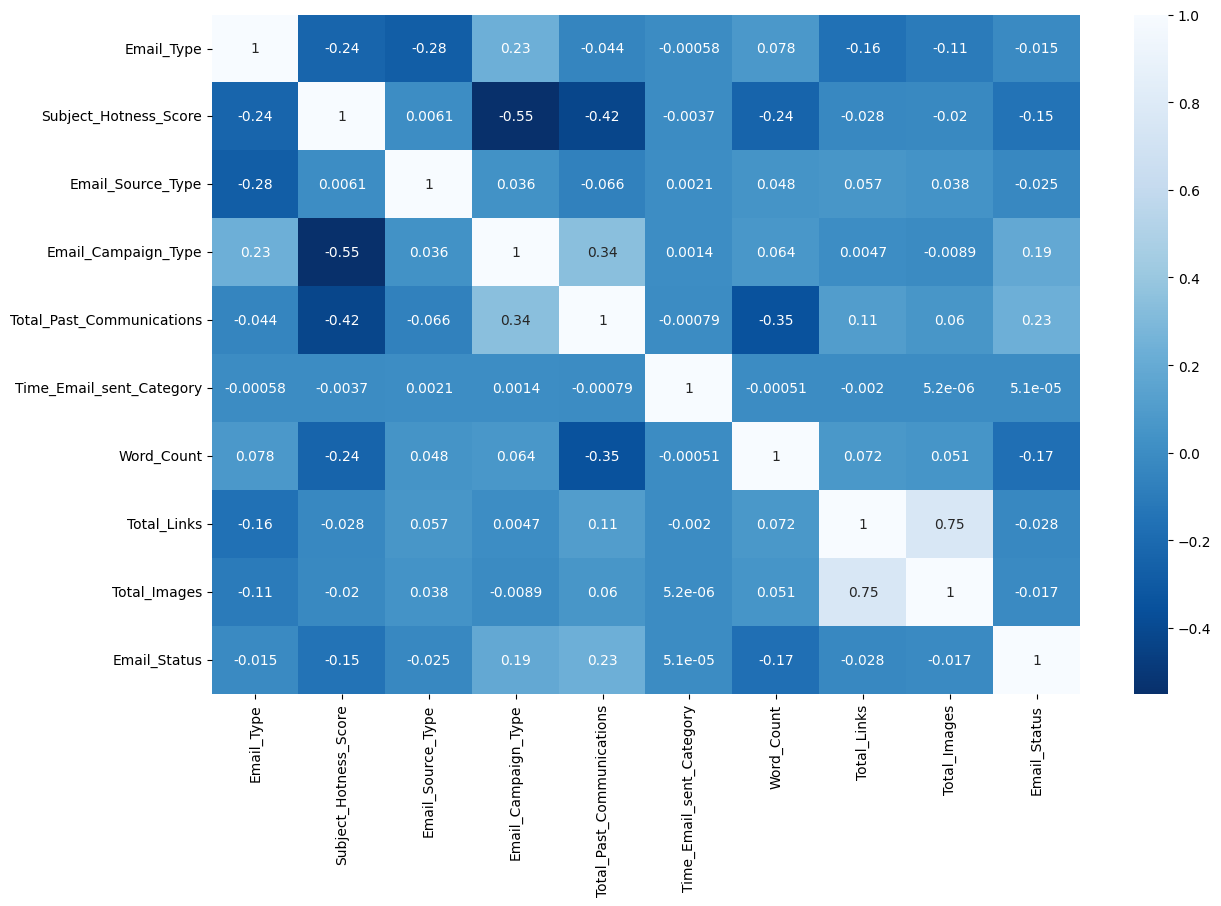

In [83]:
#correlation matrix
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(), cmap='Blues_r', annot=True)

**Observation:**
Correlation matrix justifies our earlier hypotheses. Email Campaign Type and Total past communication shows positive correlation with emails being read and acknowledged.
Word Count and Subject Hotness score are the most negatives amongst other. We can see multicollinearity involved in Email Campaign Type, Total past communication and Total links, Total Images among others and we will have to deal with it.


##Data Manipulation and Feature Engineering:
Data manipulation involves manipulating and changing our dataset before feeding it to various clasification machine learning models. This involves keeping important features handling multicollinearity in the dataset, outlier treatment and creating dummy variables if necessary.

We have outliers in our dataset as we saw it earlier in data exploration but as the classes are imbalanced and we cannot also risk overfitting, so we will be exploring how many outliers we have in each class and then decide whether we should keep them or get rid of them.



**Multicollinearity and Feature Selection:**

Multicollinearity occurs when two or more independent continuous features in the dataset are highly correlated and can help predict each other and the dependent variable. This makes it difficult to individually analyse the affect of these individual independent variables on the target or dependent variable.

We can quantify multicollinearity using Variance Inflation Factors (VIF).

VIF = 1/(1-R^2) 
The more the value of R^2 is closer to 1 the more, VIF score tends to infinity.
VIF starts with 1 and denotes that the variable has no correlation at all.
VIF more than 5-10 can be considered as serious case of multicollinearity and can affect prediction models.

In [84]:
#VIF code
def vif_calc(df):
  vif = pd.DataFrame()
  vif["variables"] = df.columns
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return(vif)

In [85]:
#let's get VIF scores
vif_df = vif_calc(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,variables,VIF
0,Subject_Hotness_Score,1.805701
1,Total_Past_Communications,3.939214
2,Word_Count,4.065844
3,Total_Links,8.690857
4,Total_Images,3.171439


We can see that only Total Links is higher than 5. Earlier we saw that Total Images and Total Links are highly correlated to each other with a score of 0.75. We can try combining both of these or deleting one of these.

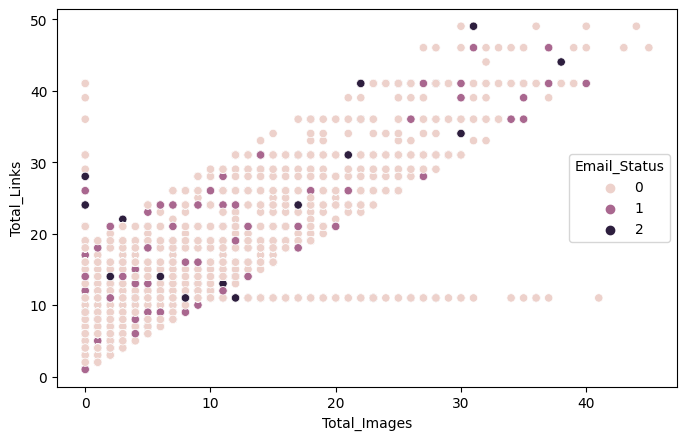

In [86]:
#scatter plot between images and links, shows a linear relationship
sns.scatterplot(x=df["Total_Images"],y=df["Total_Links"],hue=df['Email_Status']) #it shows the collinearity

In [87]:
#we can try combining them up
df['Total_Img_links'] = df['Total_Images'] + df['Total_Links']
df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)

In [88]:
#let's check VIF scores
vif_df = vif_calc(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,variables,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Total_Img_links,2.629047


Now we have our multicollinearity in check!!



**Outliers:**

With the help of box-plots, we earlier saw that besides Word Count all our other continuous variables have outliers, but deleting them would lead to loss of information as our target variable is highly imbalanced we need to make sure that we aren't deleting more than 5% of information or data related to the minority class.

In [89]:
#Let's check the number of outliers in each category of diff continuous features
cont_var.remove('Word_Count')
cont_var.remove('Total_Links')
cont_var.remove('Total_Images')
cont_var.append('Total_Img_links')


In [90]:
#the number of outliers in different features acc to email_status
outliers = {}
for elem in cont_var:
  q_75, q_25 = np.percentile(df.loc[:,elem],[75,25])
  IQR = q_75-q_25
  max = q_75+(1.5*IQR)
  min = q_25-(1.5*IQR)
  outlier_list=[]
  outlier_list=df.loc[df[elem] < min]['Email_Status'].tolist()
  outlier_list.append(df.loc[df[elem] > max]['Email_Status'].tolist()) 
  outliers[elem]={}
  for i in outlier_list[0]:
      outliers[elem][i] = outliers[elem].get(i,0) + 1
print(outliers)

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Total_Img_links': {0: 3061, 1: 437, 2: 122}}


We calculated the number of outliers with respect to the individual classes of our target variable. The minority class in our target variable is 1 and 2. But when we get rid of outliers we should check that we aren't deleting more than 5% of useful information related to minority class. Otherwise, the model will not be able to classify our minority classes correctly having lack of information. Let's check the percentage of outliers in minority class.

In [91]:
df['Email_Status'].value_counts()[2]

2373

In [92]:
#percentage of outliers in minority class
minority_outliers = 0  
majority_outliers = 0
for col in cont_var:
  minority_outliers += outliers[col][1]
  minority_outliers += outliers[col][2]
  majority_outliers += outliers[col][0]

total_min = df['Email_Status'].value_counts()[1] + df['Email_Status'].value_counts()[2]
total_maj = df['Email_Status'].value_counts()[0]

min_per = (minority_outliers/total_min)*100   #number of outliers in minority classes by total number minority classes
maj_per = (majority_outliers/total_maj)*100  #number of outliers in majority class by total number of majority class

print(f'The percentage of outliers in minority classes is {min_per}')
print(f'The percentage of outliers in majority class is {maj_per}')

The percentage of outliers in minority classes is 5.256486728303012
The percentage of outliers in majority class is 6.002803006861907


We have more than 5% outliers in minority section and hence to avoid lack of information, we decide against deleting them.

**Feature Scaling**

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is done to prevent biased nature of machine learning algorithms towards features with greater values and scale.

In [93]:
#let's add back word count
cont_var.append('Word_Count')

In [94]:
#feature scaling of numerical variables
for elem in cont_var:
  df[elem] = (df[elem] - df[elem].min()) / (df[elem].max() - df[elem].min())

df.head(1)

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Total_Img_links
0,1,0.44,2,2,0.492537,1,0.31348,0,0.076087


**One hot encoding**

For categorical variables where no such ordinal relationship exists, the integer encoding is not enough. We have categorical data integer encoded with us, but assuming a natural order and allowing this data to the model may result in poor performance. If the
categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.

In [95]:
#getting dummy variables for categorical data
categorical_variables.remove('Customer_Location')

In [96]:
#categorical var that need to be encoded
categorical_variables

['Email_Type',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Time_Email_sent_Category']

In [97]:
#creating dummy variables
df = pd.get_dummies(df,columns=categorical_variables)
# as some features had binary categories, we are going to delete one of them to keep it binary encoded and have less columns
df.drop('Email_Type_2',axis=1,inplace=True)
df.drop('Email_Source_Type_2',axis=1,inplace=True)
df.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Total_Img_links,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,0.44,0.492537,0.31348,0,0.076087,1,0,0,1,0,1,0,0


In [98]:
#shape
df.shape

(68353, 13)

In [99]:
#Email_Status should be the last col
columns=list(df.columns)
columns.remove('Email_Status')
columns.append('Email_Status')
df=df[columns]
df.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Img_links,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Email_Status
0,0.44,0.492537,0.31348,0.076087,1,0,0,1,0,1,0,0,0


##**Modelling**:


**Train-Test Split**


In [100]:
df.shape

(68353, 13)

In [101]:
#X and Y 
X = df.drop('Email_Status',axis=1)
y = df['Email_Status']
print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {y.shape}')

Shape of X: (68353, 12)
Shape of Y: (68353,)


In [102]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) 
#we need to stratify to get same proprtion of classes in both the sets

####**Handling Class Imbalance**

In the exploratory data analysis, we clearly saw that the number of emails being ignored was a lot more than being read and acknowledged. 
This imbalance in the class, can lead to biased classification towards ignored emails. We can handle it with Oversampling and Undersampling.

First, we will go with Random Undersampling and check the results for various models that we will be testing and then with SMOTE. This technique generates synthetic data for the minority class. Lastly, we will analyze which method works for the best for our dataset.

Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.



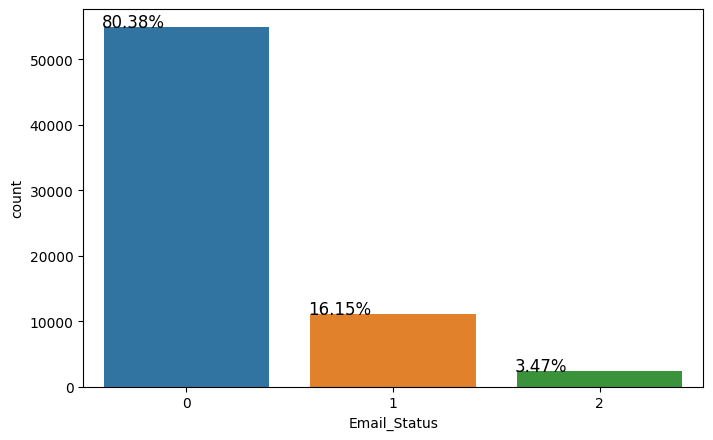

In [103]:
#count plot for target variable
#visualizing our imbalanced dataset
ax = sns.countplot(x=df['Email_Status'])
totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)
plt.show()

Only 3% of observations are classified as acknowledged emails and 80% are ignored emails. This will create a bias in favour of ignored emails in the model.

In [104]:
df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

We will be applying the Random Under Sampler and SMOTE algorithms to balance our classes on the train set only, so that the model doesn't catch up to the test set at all.
Before balancing, we made sure the train split has class distribution as same as the main dataset by using stratify while splitting.

**Random Undersampling:**



In [105]:
#importing random under sampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
#resample
rus = RandomUnderSampler(random_state=42, replacement=True)
x_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)

#print shape
print('Original dataset shape:', len(y_train))
print('Resampled dataset shape', len(y_train_rus))

Original dataset shape: 54682
Resampled dataset shape 5694


Class=0, n=1898 (33.333%)
Class=1, n=1898 (33.333%)
Class=2, n=1898 (33.333%)


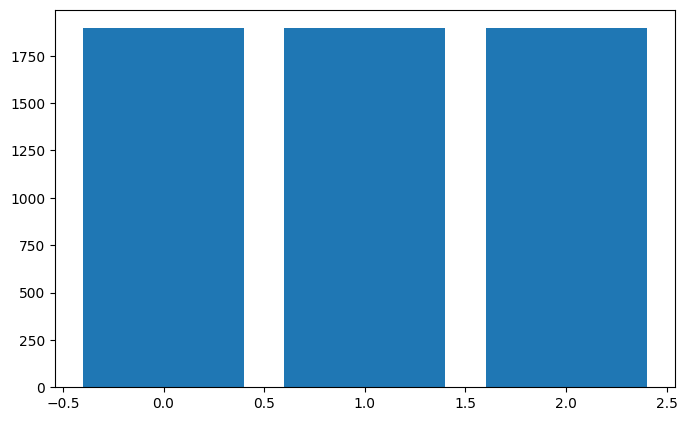

In [106]:
#visualization of resampled data
def resampled_data_visual(y_train_rus):
  counter = Counter(y_train_rus)
  for key,value in counter.items():
    per = value / len(y_train_rus) * 100
    print('Class=%d, n=%d (%.3f%%)' % (key, value, per))
  # plot the distribution
  plt.bar(counter.keys(), counter.values())
  plt.show()

resampled_data_visual(y_train_rus)

**SMOTE:** 

In [107]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_train_smote))

Original dataset shape 54682
Resampled dataset shape 131859


Class=1, n=43953 (33.333%)
Class=0, n=43953 (33.333%)
Class=2, n=43953 (33.333%)


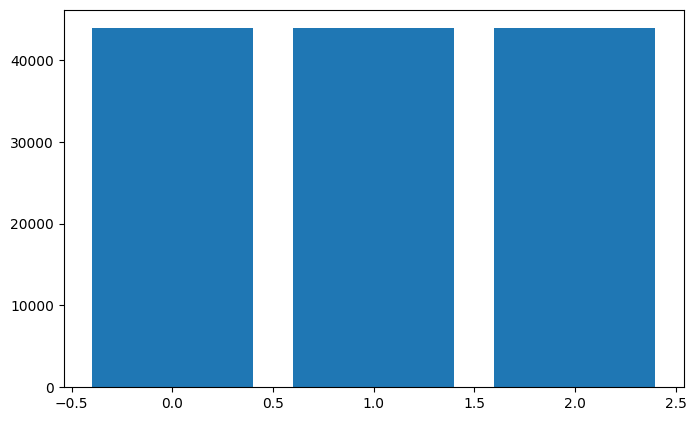

In [108]:
#visualization of resampled data
resampled_data_visual(y_train_smote)

####**Logistic Regression:**

Logistic Regression is a classification algorithm that predicts the probability of an outcome that can have only two values. 

Multinomial logistic regression is an extension of logistic regression that adds native support for multi-class classification problems.




In [109]:
#importing libraries
from sklearn.linear_model import LogisticRegression
#fitting Undersampling
logistic_rus = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_rus.fit(x_train_rus, y_train_rus)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [110]:
#fitting on smote
logistic_smote = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_smote.fit(x_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [111]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1score', 'Train_AUC' ,'Test_Accuracy', 'Test_Recall', 'Test_Precision', 'Test_F1score', 'Test_AUC']

In [112]:
#Function to evaluate the model

def model_evaluation(model_name_RUS,model_name_SMOTE,model_var_rus, model_var_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test):
  ''' This function predicts and evaluates various models for clasification for Random Undersampling and SMOTE algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
  
  #Making predictions random undersampling
  y_pred_rus_train = model_var_rus.predict(x_train_rus)
  y_pred_rus_test = model_var_rus.predict(X_test)
  #probs
  train_rus_proba = model_var_rus.predict_proba(x_train_rus)
  test_rus_proba = model_var_rus.predict_proba(X_test)

  #Making predictions smote
  y_pred_smote_train = model_var_smote.predict(x_train_smote)
  y_pred_smote_test = model_var_smote.predict(X_test)
  #probs
  train_sm_proba = model_var_smote.predict_proba(x_train_smote)
  test_sm_proba = model_var_smote.predict_proba(X_test)

  #Evaluation 
  #Accuracy RUS
  accuracy_rus_train = accuracy_score(y_train_rus,y_pred_rus_train)
  accuracy_rus_test = accuracy_score(y_test,y_pred_rus_test)
  #Accuracy SMOTE
  accuracy_smote_train = accuracy_score(y_train_smote,y_pred_smote_train)
  accuracy_smote_test = accuracy_score(y_test,y_pred_smote_test)

  #Confusion Matrix RUS
  cm_rus_train = confusion_matrix(y_train_rus,y_pred_rus_train)
  cm_rus_test = confusion_matrix(y_test,y_pred_rus_test)
  #Confusion Matrix SMOTE
  cm_smote_train = confusion_matrix(y_train_smote,y_pred_smote_train)
  cm_smote_test = confusion_matrix(y_test,y_pred_smote_test)

  #Recall RUS
  train_recall_rus = recall_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_recall_rus = recall_score(y_test,y_pred_rus_test, average='weighted')
  #Recall SMOTE
  train_recall_smote = recall_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_recall_smote = recall_score(y_test,y_pred_smote_test, average='weighted')

  #Precision RUS
  train_precision_rus = precision_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_precision_rus = precision_score(y_test,y_pred_rus_test, average='weighted')
  #Precision SMOTE
  train_precision_smote = precision_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_precision_smote = precision_score(y_test,y_pred_smote_test, average='weighted')

  #F1 Score RUS
  train_f1_rus = f1_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_f1_rus = f1_score(y_test,y_pred_rus_test, average='weighted')
  #F1 Score SMOTE
  train_f1_smote = f1_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_f1_smote = f1_score(y_test,y_pred_smote_test, average='weighted')

  #ROC-AUC RUS
  train_auc_rus = roc_auc_score(y_train_rus,train_rus_proba,average='weighted',multi_class = 'ovr')
  test_auc_rus = roc_auc_score(y_test,test_rus_proba,average='weighted',multi_class = 'ovr')
  #ROC-AUC SMOTE
  train_auc_smote = roc_auc_score(y_train_smote,train_sm_proba,average='weighted',multi_class = 'ovr')
  test_auc_smote = roc_auc_score(y_test,test_sm_proba,average='weighted',multi_class = 'ovr')

  #Visualising Results RUS
  print("----- Evaluation on Random Undersampled data -----" + str(model_name_RUS) + "------")
  print("--------------- Train Data ------------\n")
  print("Confusion matrix \n")
  print(cm_rus_train)
  ax= plt.subplot()
  sns.heatmap(cm_rus_train, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix Train '+ str(model_name_RUS))
  plt.show()
  print(classification_report(y_train_rus,y_pred_rus_train))

  print("--------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_rus_test)
  ax= plt.subplot()
  sns.heatmap(cm_rus_test, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix Test '+ str(model_name_RUS))
  plt.show()
  print(classification_report(y_test,y_pred_rus_test))

  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_rus_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+"AUC="+str(test_auc_rus))
  plt.title('Multiclass ROC curve of ' + str(model_name_RUS))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()




  #Visualising Results SMOTE
  print("----- Evaluation on SMOTE data -------" + str(model_name_SMOTE) + '-----')
  print("--------------- Train Data ------------\n")
  print("Confusion matrix \n")
  print(cm_smote_train)
  ax= plt.subplot()
  sns.heatmap(cm_smote_train, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix Train ' + str(model_name_SMOTE))
  plt.show()
  print(classification_report(y_train_smote,y_pred_smote_train))

  print("---------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_smote_test)
  ax= plt.subplot()
  sns.heatmap(cm_smote_test, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix Test ' + str(model_name_SMOTE))
  plt.show()
  print(classification_report(y_test,y_pred_smote_test))

 
  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_sm_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+" AUC="+str(test_auc_smote))
  plt.title('Multiclass ROC curve of '+ str(model_name_SMOTE))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

  #Saving our results
  global comparison_columns
  metric_scores_rus = [model_name_RUS,accuracy_rus_train,train_recall_rus,train_precision_rus,train_f1_rus,train_auc_rus,accuracy_rus_test,test_recall_rus,test_precision_rus,test_f1_rus,test_auc_rus]
  final_dict_rus = dict(zip(comparison_columns,metric_scores_rus))

  metric_scores_smote = [model_name_SMOTE,accuracy_smote_train,train_recall_smote,train_precision_smote,train_f1_smote,train_auc_smote,accuracy_smote_test,test_recall_smote,test_precision_smote,test_f1_smote,test_auc_smote]
  final_dict_smote = dict(zip(comparison_columns,metric_scores_smote))

  dict_list = [final_dict_rus, final_dict_smote]
  return dict_list

In [113]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

----- Evaluation on Random Undersampled data -----LogisticReg RUS------
--------------- Train Data ------------

Confusion matrix 

[[1326  230  342]
 [ 573  478  847]
 [ 344  272 1282]]


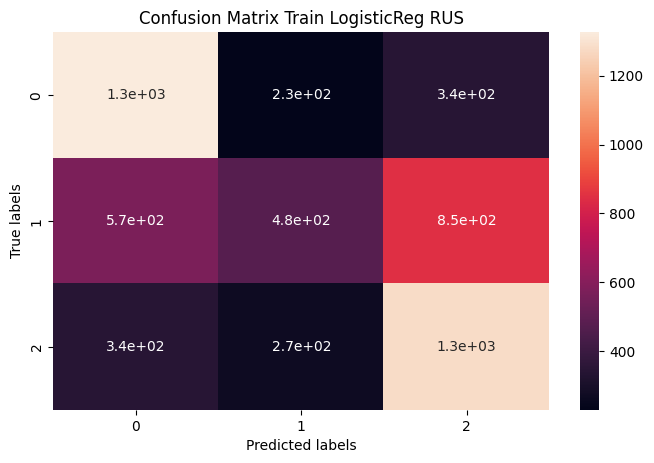

              precision    recall  f1-score   support

           0       0.59      0.70      0.64      1898
           1       0.49      0.25      0.33      1898
           2       0.52      0.68      0.59      1898

    accuracy                           0.54      5694
   macro avg       0.53      0.54      0.52      5694
weighted avg       0.53      0.54      0.52      5694

--------------Test data ---------------

Confusion matrix 

[[7680 1554 1754]
 [ 664  518 1026]
 [  98   70  307]]


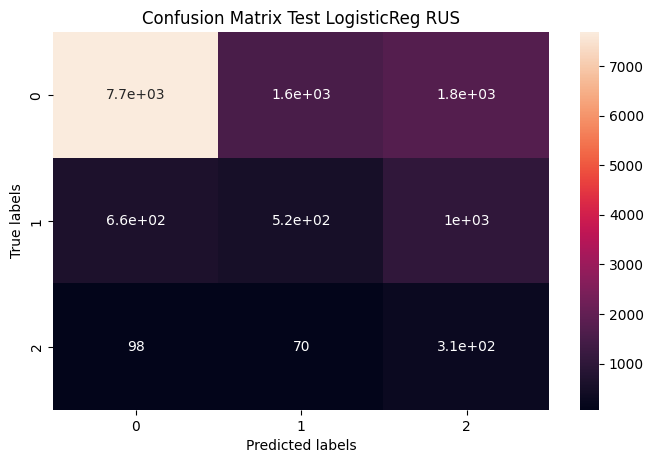

              precision    recall  f1-score   support

           0       0.91      0.70      0.79     10988
           1       0.24      0.23      0.24      2208
           2       0.10      0.65      0.17       475

    accuracy                           0.62     13671
   macro avg       0.42      0.53      0.40     13671
weighted avg       0.77      0.62      0.68     13671



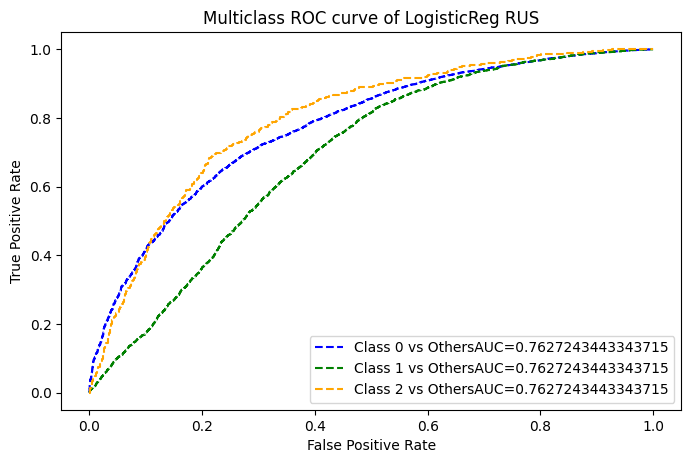

----- Evaluation on SMOTE data -------LogisticReg SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[30751  5882  7320]
 [13478  9703 20772]
 [ 7974  5822 30157]]


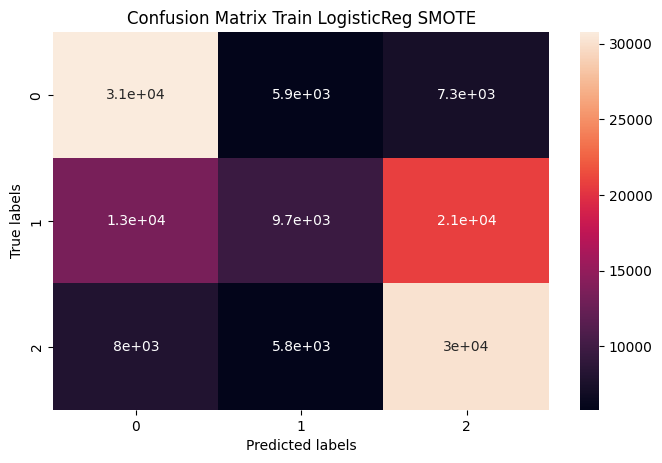

              precision    recall  f1-score   support

           0       0.59      0.70      0.64     43953
           1       0.45      0.22      0.30     43953
           2       0.52      0.69      0.59     43953

    accuracy                           0.54    131859
   macro avg       0.52      0.54      0.51    131859
weighted avg       0.52      0.54      0.51    131859

---------------Test data ---------------

Confusion matrix 

[[7743 1452 1793]
 [ 694  477 1037]
 [  99   64  312]]


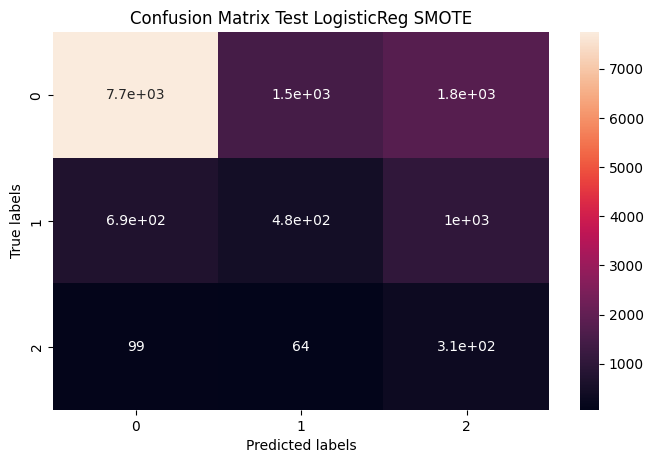

              precision    recall  f1-score   support

           0       0.91      0.70      0.79     10988
           1       0.24      0.22      0.23      2208
           2       0.10      0.66      0.17       475

    accuracy                           0.62     13671
   macro avg       0.42      0.53      0.40     13671
weighted avg       0.77      0.62      0.68     13671



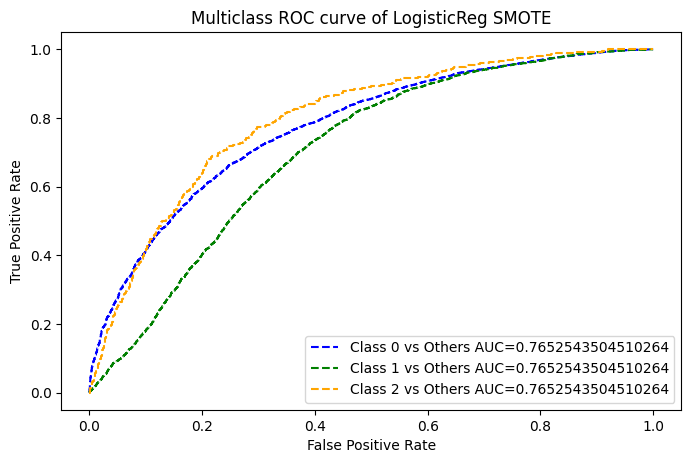

[{'Model_Name': 'LogisticReg RUS',
  'Test_AUC': 0.7627243443343715,
  'Test_Accuracy': 0.6221198156682027,
  'Test_F1score': 0.679839243381541,
  'Test_Precision': 0.7737100197265303,
  'Test_Recall': 0.6221198156682027,
  'Train_AUC': 0.7228344368556848,
  'Train_Accuracy': 0.5419740077274324,
  'Train_F1score': 0.5198207072902474,
  'Train_Precision': 0.53258197700377,
  'Train_Recall': 0.5419740077274324},
 {'Model_Name': 'LogisticReg SMOTE',
  'Test_AUC': 0.7652543504510264,
  'Test_Accuracy': 0.6240947992100065,
  'Test_F1score': 0.6801839061151311,
  'Test_Precision': 0.7711822545736784,
  'Test_Recall': 0.6240947992100065,
  'Train_AUC': 0.7207683115837691,
  'Train_Accuracy': 0.5355038336404796,
  'Train_F1score': 0.5088869681622126,
  'Train_Precision': 0.5200181133553751,
  'Train_Recall': 0.5355038336404796}]

In [114]:
#Let's evaluate logistic reg
logistic_reg_list = model_evaluation('LogisticReg RUS','LogisticReg SMOTE',logistic_rus, logistic_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
logistic_reg_list

In [115]:
#adding result to final list
add_list_to_final_df(logistic_reg_list)

In [116]:
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.541974,0.541974,0.532582,0.519821,0.722834,0.622120,0.622120,0.773710,0.679839,0.762724
1,LogisticReg SMOTE,0.535504,0.535504,0.520018,0.508887,0.720768,0.624095,0.624095,0.771182,0.680184,0.765254


####**Decison Tree Model:**
Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 

In [117]:
#Importing libraries
from sklearn.tree import DecisionTreeClassifier

In [118]:
#Classifier RUS
dt_rus = DecisionTreeClassifier()
dt_rus.fit(x_train_rus,y_train_rus)

DecisionTreeClassifier()

In [119]:
#Classifier SMOTE
dt_smote = DecisionTreeClassifier()
dt_smote.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

----- Evaluation on Random Undersampled data -----Decision Tree RUS------
--------------- Train Data ------------

Confusion matrix 

[[1898    0    0]
 [   1 1897    0]
 [   0    4 1894]]


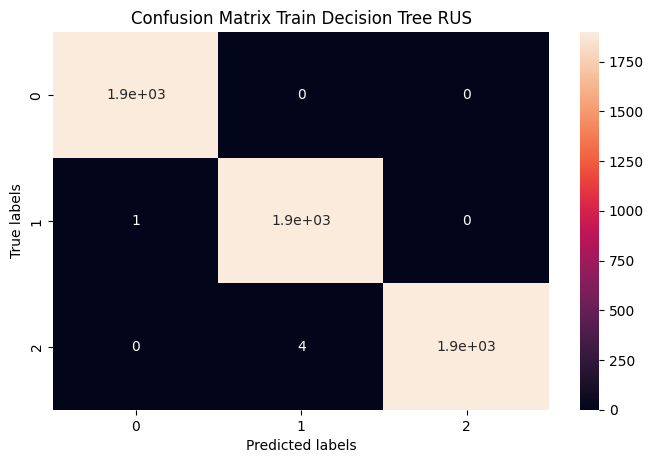

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1898
           1       1.00      1.00      1.00      1898
           2       1.00      1.00      1.00      1898

    accuracy                           1.00      5694
   macro avg       1.00      1.00      1.00      5694
weighted avg       1.00      1.00      1.00      5694

--------------Test data ---------------

Confusion matrix 

[[5684 2979 2325]
 [ 668  744  796]
 [ 117  152  206]]


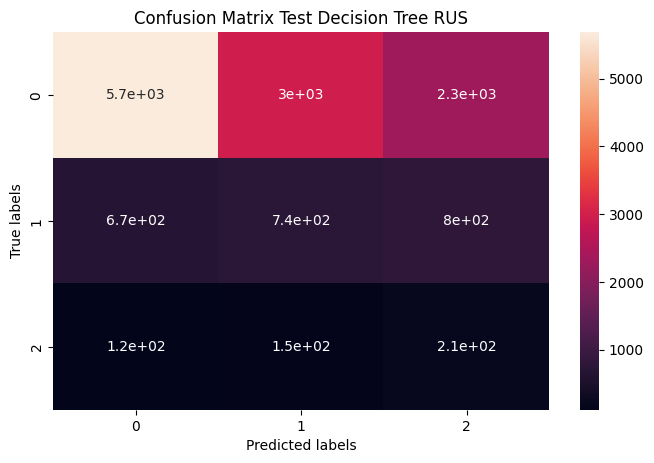

              precision    recall  f1-score   support

           0       0.88      0.52      0.65     10988
           1       0.19      0.34      0.24      2208
           2       0.06      0.43      0.11       475

    accuracy                           0.49     13671
   macro avg       0.38      0.43      0.33     13671
weighted avg       0.74      0.49      0.57     13671



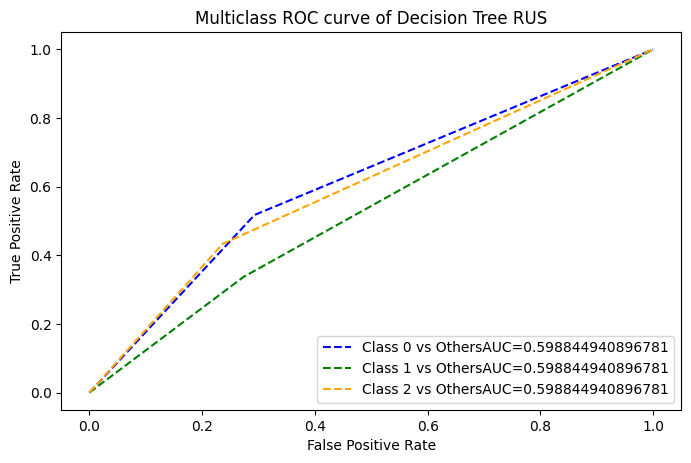

----- Evaluation on SMOTE data -------Decision Tree SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[43953     0     0]
 [   46 43907     0]
 [   17    14 43922]]


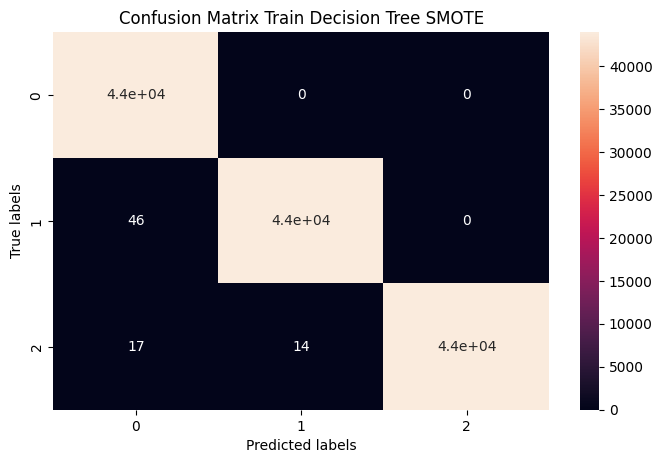

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43953
           1       1.00      1.00      1.00     43953
           2       1.00      1.00      1.00     43953

    accuracy                           1.00    131859
   macro avg       1.00      1.00      1.00    131859
weighted avg       1.00      1.00      1.00    131859

---------------Test data ---------------

Confusion matrix 

[[8803 1751  434]
 [1274  668  266]
 [ 264  154   57]]


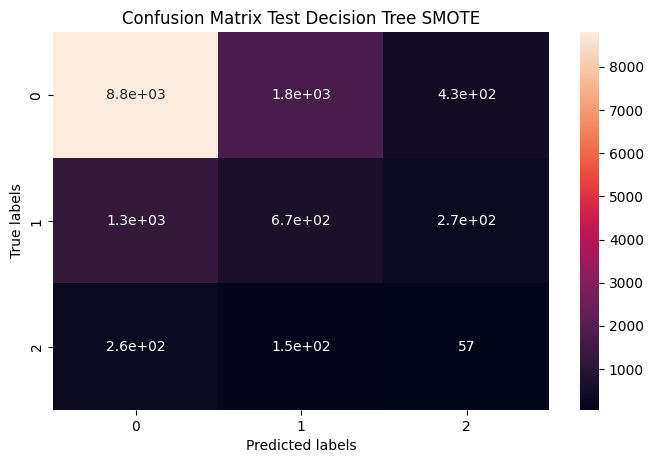

              precision    recall  f1-score   support

           0       0.85      0.80      0.83     10988
           1       0.26      0.30      0.28      2208
           2       0.08      0.12      0.09       475

    accuracy                           0.70     13671
   macro avg       0.40      0.41      0.40     13671
weighted avg       0.73      0.70      0.71     13671



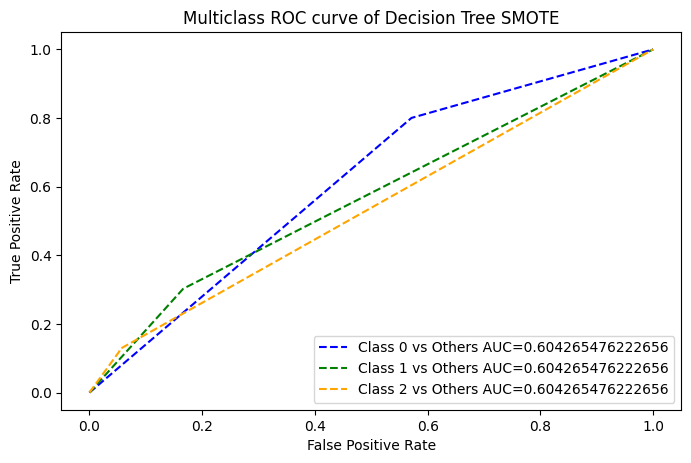

[{'Model_Name': 'Decision Tree RUS',
  'Test_AUC': 0.598844940896781,
  'Test_Accuracy': 0.4852607709750567,
  'Test_F1score': 0.5666719304077599,
  'Test_Precision': 0.7393735218176067,
  'Test_Recall': 0.4852607709750567,
  'Train_AUC': 0.999999028426573,
  'Train_Accuracy': 0.9991218826835265,
  'Train_F1score': 0.9991218820129968,
  'Train_Precision': 0.999123083782941,
  'Train_Recall': 0.9991218826835265},
 {'Model_Name': 'Decision Tree SMOTE',
  'Test_AUC': 0.604265476222656,
  'Test_Accuracy': 0.6969497476409919,
  'Test_F1score': 0.711797816417904,
  'Test_Precision': 0.7287526846717596,
  'Test_Recall': 0.6969497476409919,
  'Train_AUC': 0.9999996320483633,
  'Train_Accuracy': 0.9994160428943037,
  'Train_F1score': 0.9994160896590741,
  'Train_Precision': 0.9994166493877829,
  'Train_Recall': 0.9994160428943037}]

In [120]:
dt_eval_list = model_evaluation('Decision Tree RUS', 'Decision Tree SMOTE', dt_rus, dt_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
dt_eval_list

In [121]:
#adding list
add_list_to_final_df(dt_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.541974,0.541974,0.532582,0.519821,0.722834,0.622120,0.622120,0.773710,0.679839,0.762724
1,LogisticReg SMOTE,0.535504,0.535504,0.520018,0.508887,0.720768,0.624095,0.624095,0.771182,0.680184,0.765254
2,Decision Tree RUS,0.999122,0.999122,0.999123,0.999122,0.999999,0.485261,0.485261,0.739374,0.566672,0.598845
3,Decision Tree SMOTE,0.999416,0.999416,0.999417,0.999416,1.000000,0.696950,0.696950,0.728753,0.711798,0.604265


**Observation:** Clearly Decision Tree models are overfitting. Both the datasets, whether undersampled or oversampled with SMOTE are working really well on train data but not on test data.



####**Random Forest Model:**

To prevent overfitting, we will be building random forest model. Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. The ensemble models with only one tree will overfit to data as well because it is the same as a single decision tree. When we add trees to the Random Forest then the tendency to overfitting decreases.



In [122]:
#importing library
from sklearn.ensemble import RandomForestClassifier

In [123]:
#RUS
rf_rus = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_rus.fit(x_train_rus,y_train_rus)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

In [124]:
#SMOTE
rf_smote = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_smote.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

----- Evaluation on Random Undersampled data -----Random Forest RUS------
--------------- Train Data ------------

Confusion matrix 

[[1383  187  328]
 [ 543  505  850]
 [ 301  266 1331]]


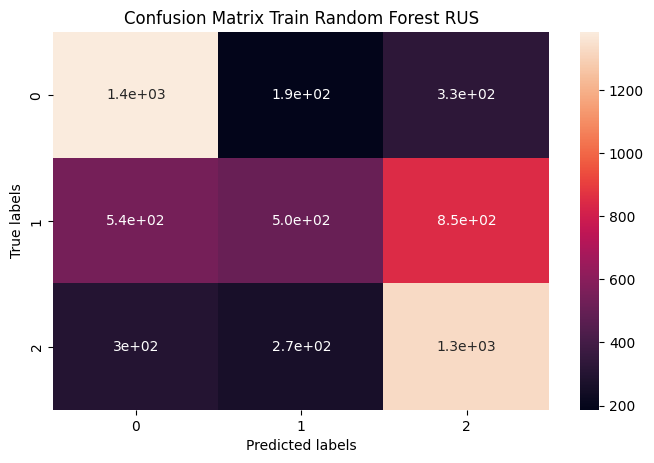

              precision    recall  f1-score   support

           0       0.62      0.73      0.67      1898
           1       0.53      0.27      0.35      1898
           2       0.53      0.70      0.60      1898

    accuracy                           0.57      5694
   macro avg       0.56      0.57      0.54      5694
weighted avg       0.56      0.57      0.54      5694

--------------Test data ---------------

Confusion matrix 

[[7785 1351 1852]
 [ 685  484 1039]
 [  91   67  317]]


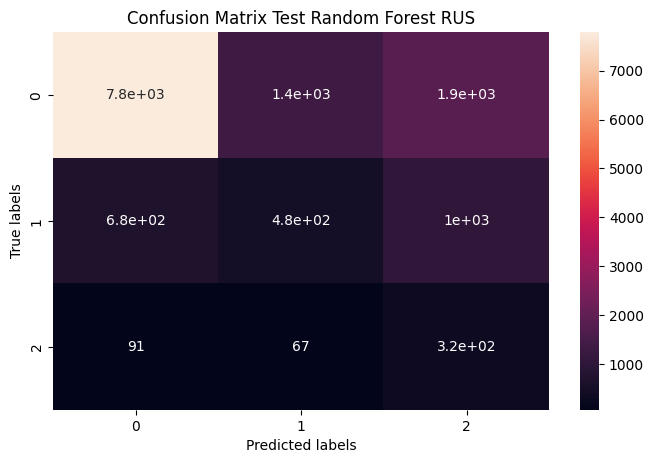

              precision    recall  f1-score   support

           0       0.91      0.71      0.80     10988
           1       0.25      0.22      0.24      2208
           2       0.10      0.67      0.17       475

    accuracy                           0.63     13671
   macro avg       0.42      0.53      0.40     13671
weighted avg       0.78      0.63      0.68     13671



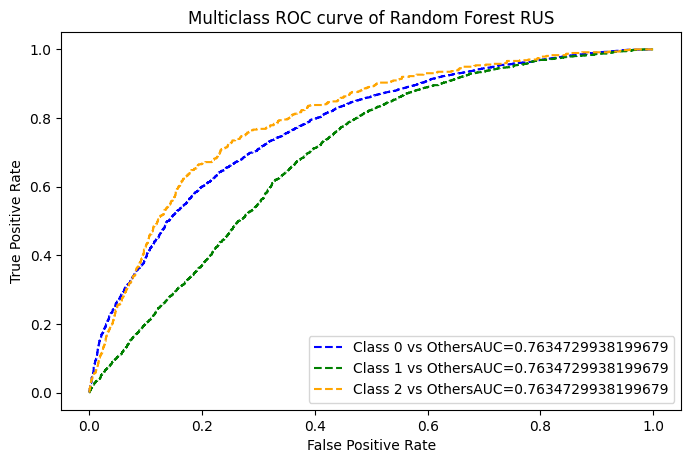

----- Evaluation on SMOTE data -------Random Forest SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[33822  4580  5551]
 [14991  9686 19276]
 [ 7415  6578 29960]]


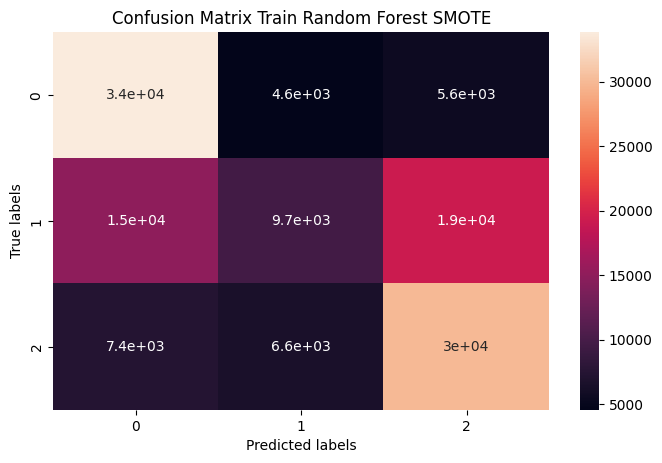

              precision    recall  f1-score   support

           0       0.60      0.77      0.68     43953
           1       0.46      0.22      0.30     43953
           2       0.55      0.68      0.61     43953

    accuracy                           0.56    131859
   macro avg       0.54      0.56      0.53    131859
weighted avg       0.54      0.56      0.53    131859

---------------Test data ---------------

Confusion matrix 

[[8547 1079 1362]
 [ 884  470  854]
 [ 111   79  285]]


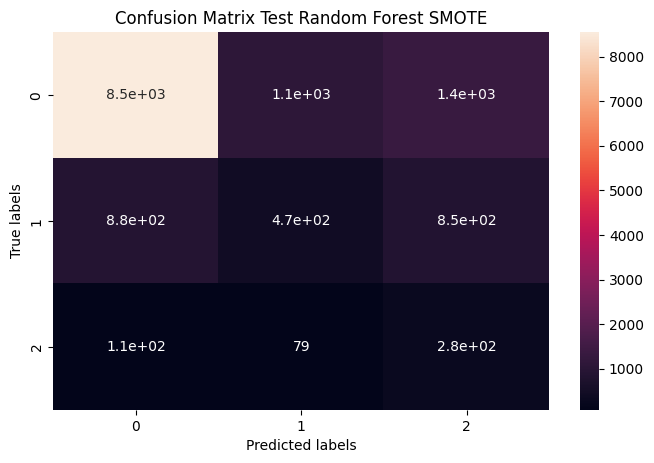

              precision    recall  f1-score   support

           0       0.90      0.78      0.83     10988
           1       0.29      0.21      0.25      2208
           2       0.11      0.60      0.19       475

    accuracy                           0.68     13671
   macro avg       0.43      0.53      0.42     13671
weighted avg       0.77      0.68      0.72     13671



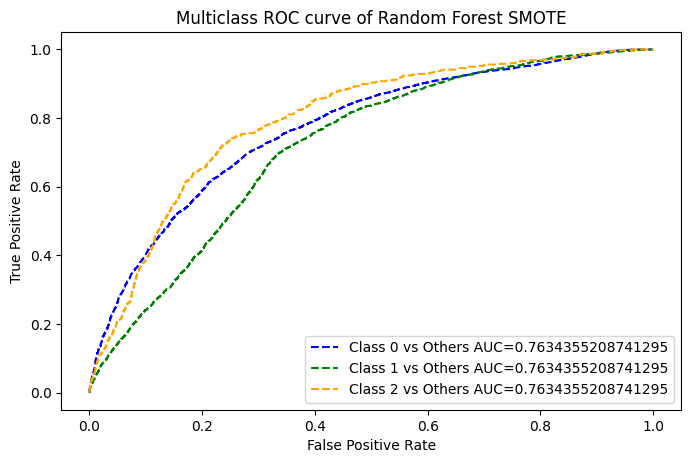

[{'Model_Name': 'Random Forest RUS',
  'Test_AUC': 0.7634729938199679,
  'Test_Accuracy': 0.6280447662936142,
  'Test_F1score': 0.6841713877588803,
  'Test_Precision': 0.7754233629597981,
  'Test_Recall': 0.6280447662936142,
  'Train_AUC': 0.7537853426026989,
  'Train_Accuracy': 0.565331928345627,
  'Train_F1score': 0.5427419799819592,
  'Train_Precision': 0.5595483093444947,
  'Train_Recall': 0.565331928345627},
 {'Model_Name': 'Random Forest SMOTE',
  'Test_AUC': 0.7634355208741295,
  'Test_Accuracy': 0.6804184039207081,
  'Test_F1score': 0.7154587562726483,
  'Test_Precision': 0.7705208259350318,
  'Test_Recall': 0.6804184039207081,
  'Train_AUC': 0.7580678479928142,
  'Train_Accuracy': 0.5571709174193646,
  'Train_F1score': 0.5270095256083359,
  'Train_Precision': 0.5376834641549533,
  'Train_Recall': 0.5571709174193646}]

In [125]:
#Random Forest Evaluation
rf_eval_list = model_evaluation('Random Forest RUS', 'Random Forest SMOTE', rf_rus, rf_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
rf_eval_list

In [126]:
#adding list
add_list_to_final_df(rf_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.541974,0.541974,0.532582,0.519821,0.722834,0.622120,0.622120,0.773710,0.679839,0.762724
1,LogisticReg SMOTE,0.535504,0.535504,0.520018,0.508887,0.720768,0.624095,0.624095,0.771182,0.680184,0.765254
2,Decision Tree RUS,0.999122,0.999122,0.999123,0.999122,0.999999,0.485261,0.485261,0.739374,0.566672,0.598845
3,Decision Tree SMOTE,0.999416,0.999416,0.999417,0.999416,1.000000,0.696950,0.696950,0.728753,0.711798,0.604265
4,Random Forest RUS,0.565332,0.565332,0.559548,0.542742,0.753785,0.628045,0.628045,0.775423,0.684171,0.763473
5,Random Forest SMOTE,0.557171,0.557171,0.537683,0.527010,0.758068,0.680418,0.680418,0.770521,0.715459,0.763436


**Random Forest Hyperparameter Tuning:**

In [127]:
#classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [128]:
#Parameter dictionary
params = {'max_depth': [3,5,10,20],'min_samples_leaf': [5,10,20,50,100],'n_estimators': [10,25,30,50,100,200]}

In [129]:
#Grid Search to get the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")

In [130]:
#Fitting RUS to grid search
grid_search.fit(x_train_rus,y_train_rus)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='f1_weighted', verbose=1)

In [131]:
#optimal model
rf_tuned_rus = grid_search.best_estimator_

In [132]:
#Fitting SMOTE
grid_search_smote = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_smote.fit(x_train_smote,y_train_smote)
#optimal smote model
rf_tuned_smote = grid_search_smote.best_estimator_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


----- Evaluation on Random Undersampled data -----RandomF Tuned RUS------
--------------- Train Data ------------

Confusion matrix 

[[1491  164  243]
 [ 290 1259  349]
 [ 234  173 1491]]


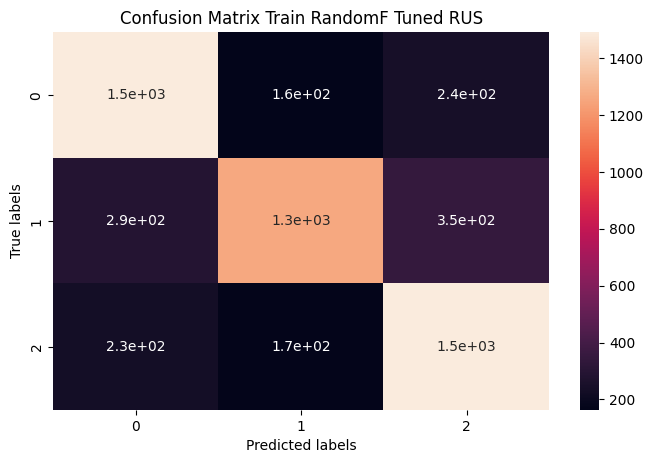

              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1898
           1       0.79      0.66      0.72      1898
           2       0.72      0.79      0.75      1898

    accuracy                           0.74      5694
   macro avg       0.75      0.74      0.74      5694
weighted avg       0.75      0.74      0.74      5694

--------------Test data ---------------

Confusion matrix 

[[7438 1968 1582]
 [ 604  684  920]
 [  77  115  283]]


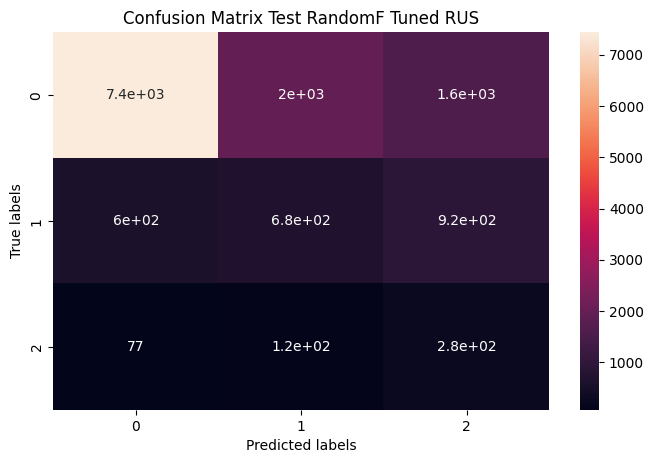

              precision    recall  f1-score   support

           0       0.92      0.68      0.78     10988
           1       0.25      0.31      0.27      2208
           2       0.10      0.60      0.17       475

    accuracy                           0.61     13671
   macro avg       0.42      0.53      0.41     13671
weighted avg       0.78      0.61      0.68     13671



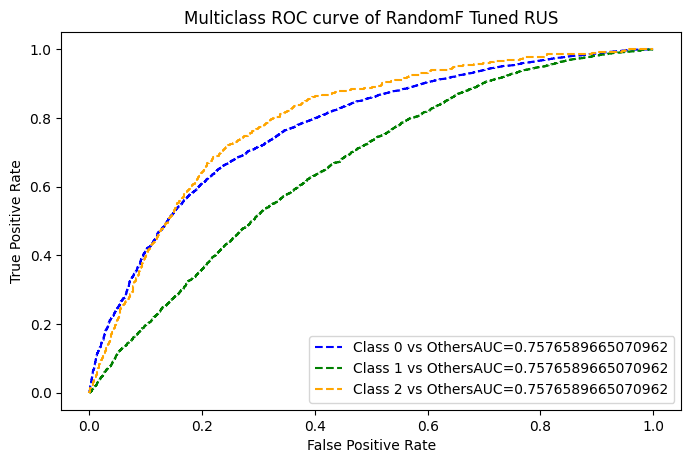

----- Evaluation on SMOTE data -------RandomF Tuned SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[39953  2970  1030]
 [ 3642 37262  3049]
 [  804   848 42301]]


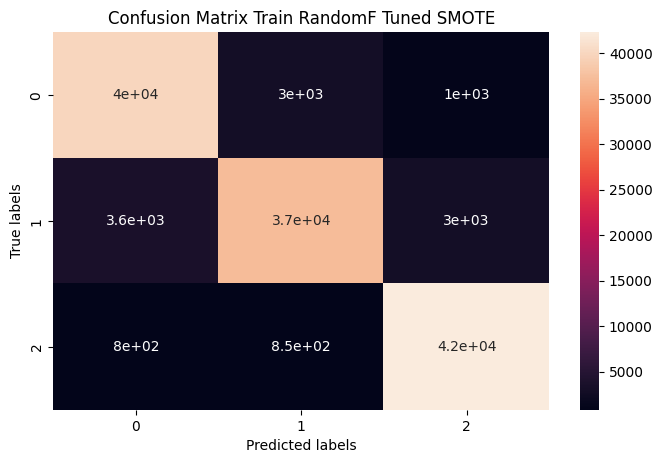

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     43953
           1       0.91      0.85      0.88     43953
           2       0.91      0.96      0.94     43953

    accuracy                           0.91    131859
   macro avg       0.91      0.91      0.91    131859
weighted avg       0.91      0.91      0.91    131859

---------------Test data ---------------

Confusion matrix 

[[9320 1280  388]
 [1159  754  295]
 [ 202  193   80]]


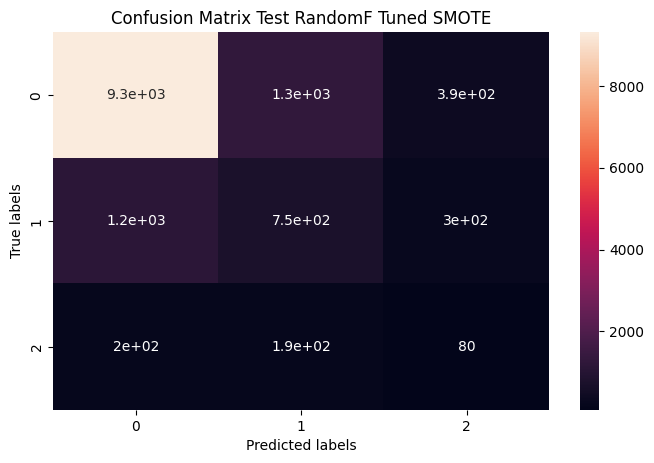

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     10988
           1       0.34      0.34      0.34      2208
           2       0.10      0.17      0.13       475

    accuracy                           0.74     13671
   macro avg       0.44      0.45      0.44     13671
weighted avg       0.76      0.74      0.75     13671



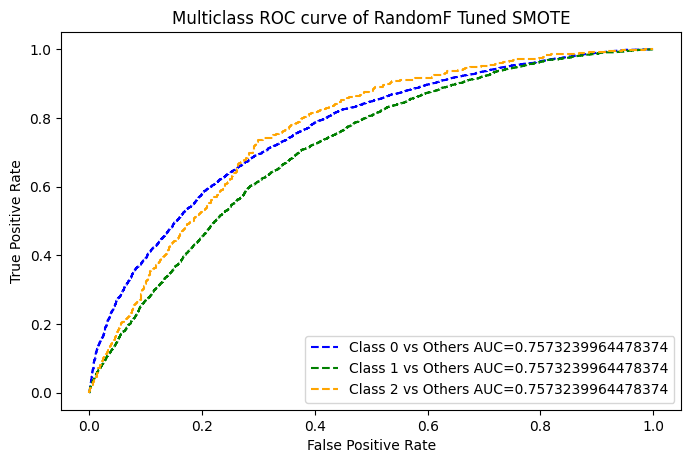

[{'Model_Name': 'RandomF Tuned RUS',
  'Test_AUC': 0.7576589665070962,
  'Test_Accuracy': 0.6148050618096701,
  'Test_F1score': 0.6762096575189265,
  'Test_Precision': 0.779784883659752,
  'Test_Recall': 0.6148050618096701,
  'Train_AUC': 0.9134095361504893,
  'Train_Accuracy': 0.7448191078328065,
  'Train_F1score': 0.743932385070194,
  'Train_Precision': 0.748197339042421,
  'Train_Recall': 0.7448191078328065},
 {'Model_Name': 'RandomF Tuned SMOTE',
  'Test_AUC': 0.7573239964478374,
  'Test_Accuracy': 0.7427401067954064,
  'Test_F1score': 0.7508011216581711,
  'Test_Precision': 0.7596556084261982,
  'Test_Recall': 0.7427401067954064,
  'Train_AUC': 0.9835795130710663,
  'Train_Accuracy': 0.9063924343427449,
  'Train_F1score': 0.9057915850497917,
  'Train_Precision': 0.9063248715670915,
  'Train_Recall': 0.9063924343427449}]

In [133]:
#Model Evaluation for Random Forest Hyperparameter Tuned
rf_tuned_list = model_evaluation('RandomF Tuned RUS', 'RandomF Tuned SMOTE', rf_tuned_rus, rf_tuned_smote,x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
rf_tuned_list

In [134]:
#adding list
add_list_to_final_df(rf_tuned_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.541974,0.541974,0.532582,0.519821,0.722834,0.622120,0.622120,0.773710,0.679839,0.762724
1,LogisticReg SMOTE,0.535504,0.535504,0.520018,0.508887,0.720768,0.624095,0.624095,0.771182,0.680184,0.765254
2,Decision Tree RUS,0.999122,0.999122,0.999123,0.999122,0.999999,0.485261,0.485261,0.739374,0.566672,0.598845
3,Decision Tree SMOTE,0.999416,0.999416,0.999417,0.999416,1.000000,0.696950,0.696950,0.728753,0.711798,0.604265
4,Random Forest RUS,0.565332,0.565332,0.559548,0.542742,0.753785,0.628045,0.628045,0.775423,0.684171,0.763473
5,Random Forest SMOTE,0.557171,0.557171,0.537683,0.527010,0.758068,0.680418,0.680418,0.770521,0.715459,0.763436
6,RandomF Tuned RUS,0.744819,0.744819,0.748197,0.743932,0.913410,0.614805,0.614805,0.779785,0.676210,0.757659
7,RandomF Tuned SMOTE,0.906392,0.906392,0.906325,0.905792,0.983580,0.742740,0.742740,0.759656,0.750801,0.757324


**Random Forest HyperParameter Tuned Feature Importance:**

In [135]:
#feature importance by random forest 
feature_imp = pd.DataFrame({"Variable": x_train_smote.columns,"Importance": rf_tuned_smote.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)

In [136]:
feature_imp

,Variable,Importance
1,Total_Past_Communications,0.245296
2,Word_Count,0.213808
0,Subject_Hotness_Score,0.203731
3,Total_Img_links,0.182748
7,Email_Campaign_Type_2,0.051592
8,Email_Campaign_Type_3,0.027774
4,Email_Type_1,0.019409
5,Email_Source_Type_1,0.017095
6,Email_Campaign_Type_1,0.012324
10,Time_Email_sent_Category_2,0.008891


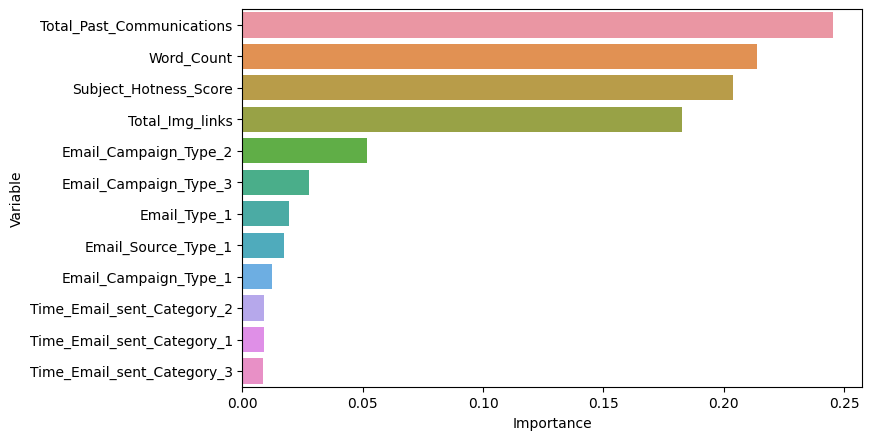

In [137]:
#visualisation
sns.barplot(x=feature_imp['Importance'],y= feature_imp['Variable'])

####**KNN Classification Model:**
The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. KNN uses the concept of similarity in terms of distance.

In [138]:
#import library
from sklearn.neighbors import KNeighborsClassifier

In [139]:
#RUS fitting
knn_rus = KNeighborsClassifier()
knn_rus.fit(x_train_rus,y_train_rus)

KNeighborsClassifier()

In [140]:
#SMOTE fitting
knn_smote = KNeighborsClassifier()
knn_smote.fit(x_train_smote,y_train_smote)

KNeighborsClassifier()

----- Evaluation on Random Undersampled data -----KNN RUS------
--------------- Train Data ------------

Confusion matrix 

[[1459  282  157]
 [ 456 1124  318]
 [ 300  469 1129]]


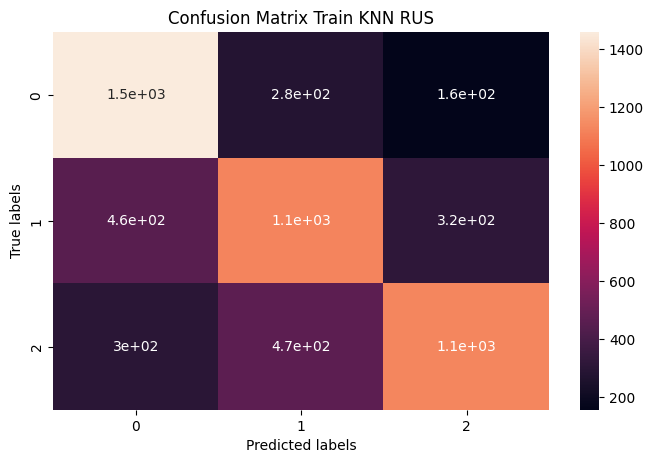

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1898
           1       0.60      0.59      0.60      1898
           2       0.70      0.59      0.64      1898

    accuracy                           0.65      5694
   macro avg       0.65      0.65      0.65      5694
weighted avg       0.65      0.65      0.65      5694

--------------Test data ---------------

Confusion matrix 

[[7013 2672 1303]
 [ 695  814  699]
 [ 114  179  182]]


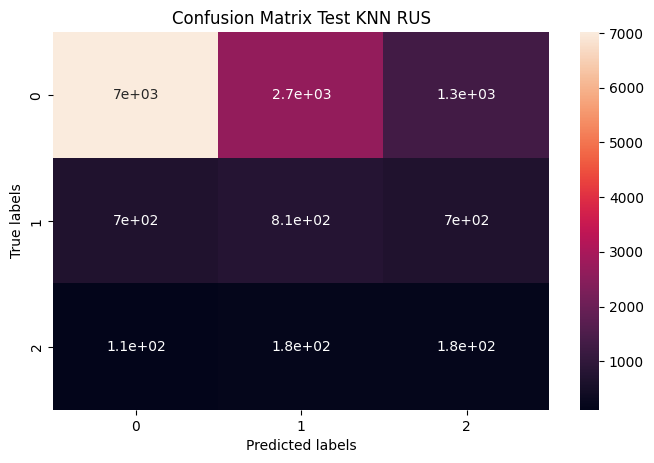

              precision    recall  f1-score   support

           0       0.90      0.64      0.75     10988
           1       0.22      0.37      0.28      2208
           2       0.08      0.38      0.14       475

    accuracy                           0.59     13671
   macro avg       0.40      0.46      0.39     13671
weighted avg       0.76      0.59      0.65     13671



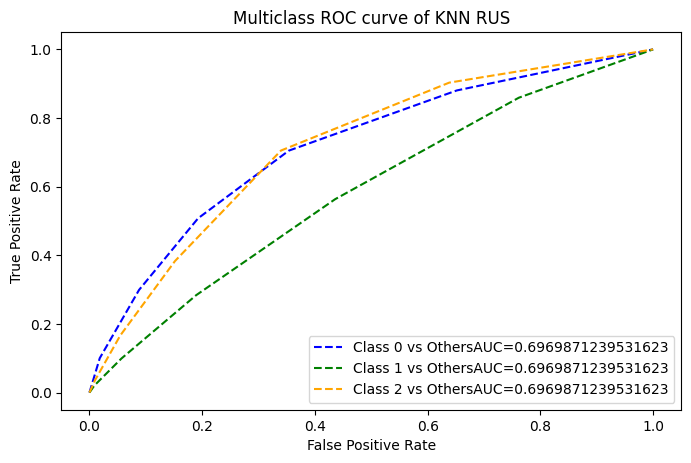

----- Evaluation on SMOTE data -------KNN SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[32165  8193  3595]
 [ 1138 41440  1375]
 [  384   949 42620]]


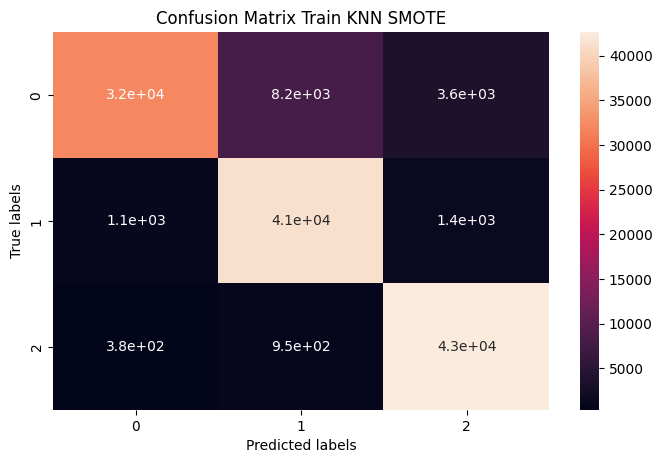

              precision    recall  f1-score   support

           0       0.95      0.73      0.83     43953
           1       0.82      0.94      0.88     43953
           2       0.90      0.97      0.93     43953

    accuracy                           0.88    131859
   macro avg       0.89      0.88      0.88    131859
weighted avg       0.89      0.88      0.88    131859

---------------Test data ---------------

Confusion matrix 

[[7140 2694 1154]
 [ 772  930  506]
 [ 144  195  136]]


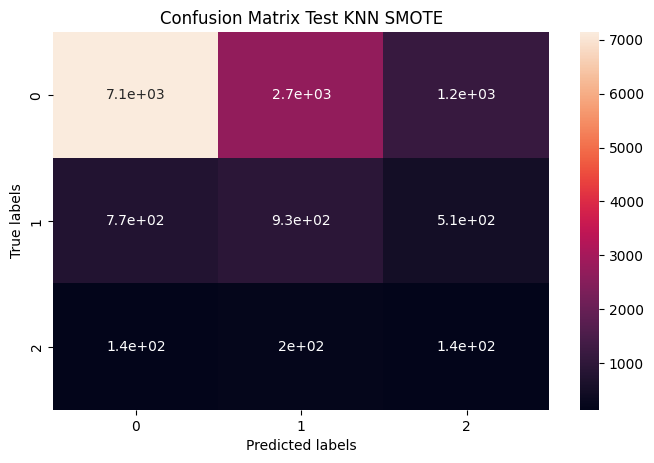

              precision    recall  f1-score   support

           0       0.89      0.65      0.75     10988
           1       0.24      0.42      0.31      2208
           2       0.08      0.29      0.12       475

    accuracy                           0.60     13671
   macro avg       0.40      0.45      0.39     13671
weighted avg       0.75      0.60      0.66     13671



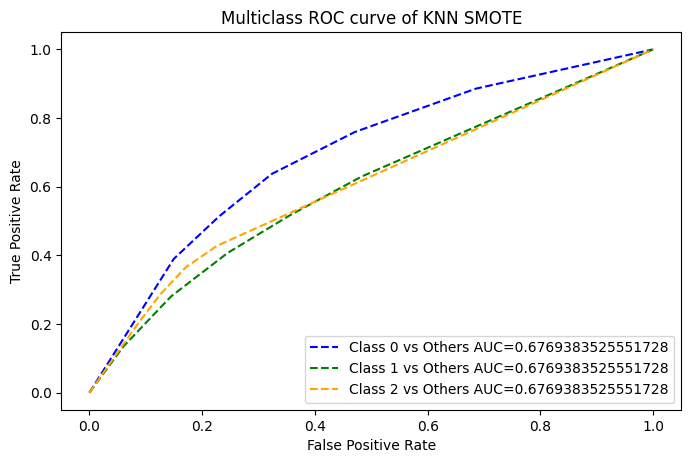

[{'Model_Name': 'KNN RUS',
  'Test_AUC': 0.6969871239531623,
  'Test_Accuracy': 0.5858386365298808,
  'Test_F1score': 0.6488534031454426,
  'Test_Precision': 0.7593837163363701,
  'Test_Recall': 0.5858386365298807,
  'Train_AUC': 0.8419226901443222,
  'Train_Accuracy': 0.6519142957499122,
  'Train_F1score': 0.6500148607378106,
  'Train_Precision': 0.6540075827486713,
  'Train_Recall': 0.6519142957499122},
 {'Model_Name': 'KNN SMOTE',
  'Test_AUC': 0.6769383525551728,
  'Test_Accuracy': 0.6002487016311902,
  'Test_F1score': 0.6566874359657796,
  'Test_Precision': 0.7543178243622645,
  'Test_Recall': 0.6002487016311902,
  'Train_AUC': 0.9835941765261241,
  'Train_Accuracy': 0.8814339559681175,
  'Train_F1score': 0.8788090628479917,
  'Train_Precision': 0.8898831438939607,
  'Train_Recall': 0.8814339559681175}]

In [141]:
#model eval of knn
knn_eval_list = model_evaluation('KNN RUS','KNN SMOTE',knn_rus,knn_smote,x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
knn_eval_list

In [142]:
#adding list
add_list_to_final_df(knn_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.541974,0.541974,0.532582,0.519821,0.722834,0.622120,0.622120,0.773710,0.679839,0.762724
1,LogisticReg SMOTE,0.535504,0.535504,0.520018,0.508887,0.720768,0.624095,0.624095,0.771182,0.680184,0.765254
2,Decision Tree RUS,0.999122,0.999122,0.999123,0.999122,0.999999,0.485261,0.485261,0.739374,0.566672,0.598845
3,Decision Tree SMOTE,0.999416,0.999416,0.999417,0.999416,1.000000,0.696950,0.696950,0.728753,0.711798,0.604265
4,Random Forest RUS,0.565332,0.565332,0.559548,0.542742,0.753785,0.628045,0.628045,0.775423,0.684171,0.763473
5,Random Forest SMOTE,0.557171,0.557171,0.537683,0.527010,0.758068,0.680418,0.680418,0.770521,0.715459,0.763436
6,RandomF Tuned RUS,0.744819,0.744819,0.748197,0.743932,0.913410,0.614805,0.614805,0.779785,0.676210,0.757659
7,RandomF Tuned SMOTE,0.906392,0.906392,0.906325,0.905792,0.983580,0.742740,0.742740,0.759656,0.750801,0.757324
8,KNN RUS,0.651914,0.651914,0.654008,0.650015,0.841923,0.585839,0.585839,0.759384,0.648853,0.696987
9,KNN SMOTE,0.881434,0.881434,0.889883,0.878809,0.983594,0.600249,0.600249,0.754318,0.656687,0.676938


**KNN Hyperparameter Tuning:**

In [143]:
#knn tuning rus
knn_rus = KNeighborsClassifier()
params = [{'n_neighbors': range(5,10),'metric': ['canberra', 'euclidean', 'minkowski']}]
knn_rus_search = GridSearchCV(knn_rus, cv = 10, param_grid = params, scoring = "f1_weighted")
knn_rus_search.fit(x_train_rus,y_train_rus)
knn_rus_tuned = knn_rus_search.best_estimator_

#knn tuning smote
knn_smote = KNeighborsClassifier()
knn_smote_search = GridSearchCV(knn_smote, cv = 10, param_grid = params, scoring = "f1_weighted")
knn_smote_search.fit(x_train_smote,y_train_smote)
knn_smote_tuned = knn_smote_search.best_estimator_

----- Evaluation on Random Undersampled data -----KNN Tuned RUS------
--------------- Train Data ------------

Confusion matrix 

[[1358  317  223]
 [ 424 1063  411]
 [ 277  487 1134]]


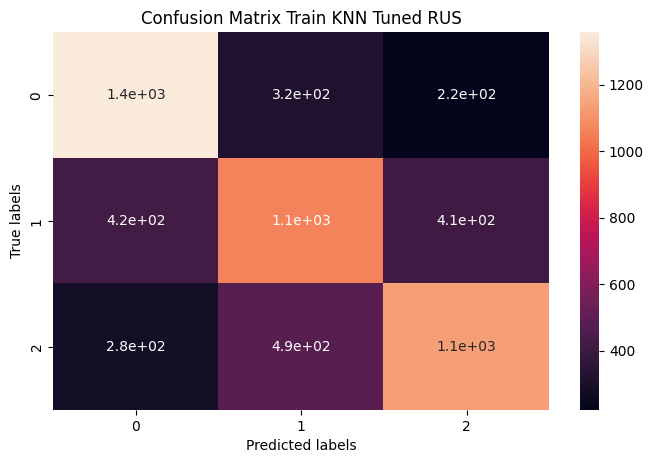

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1898
           1       0.57      0.56      0.56      1898
           2       0.64      0.60      0.62      1898

    accuracy                           0.62      5694
   macro avg       0.62      0.62      0.62      5694
weighted avg       0.62      0.62      0.62      5694

--------------Test data ---------------

Confusion matrix 

[[6868 2586 1534]
 [ 610  810  788]
 [  86  165  224]]


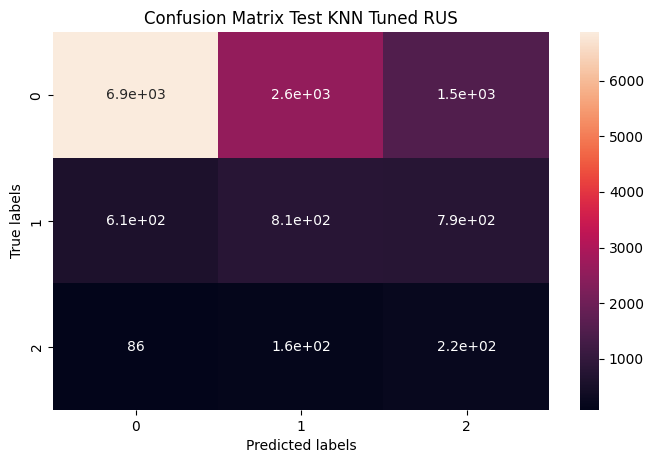

              precision    recall  f1-score   support

           0       0.91      0.63      0.74     10988
           1       0.23      0.37      0.28      2208
           2       0.09      0.47      0.15       475

    accuracy                           0.58     13671
   macro avg       0.41      0.49      0.39     13671
weighted avg       0.77      0.58      0.65     13671



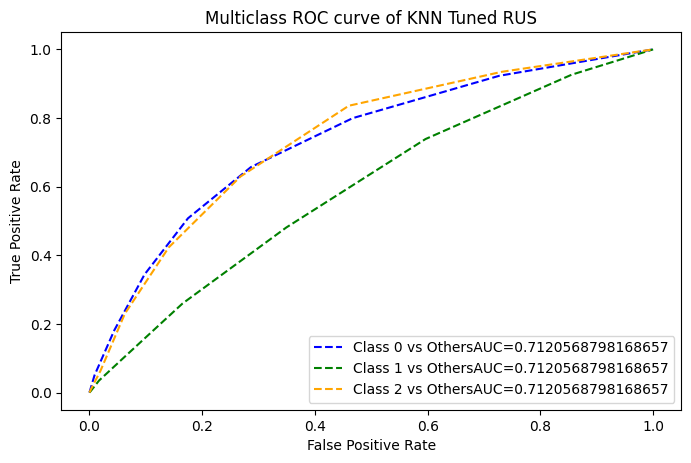

----- Evaluation on SMOTE data -------KNN Tuned SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[33637  6762  3554]
 [ 2157 40524  1272]
 [  605  1365 41983]]


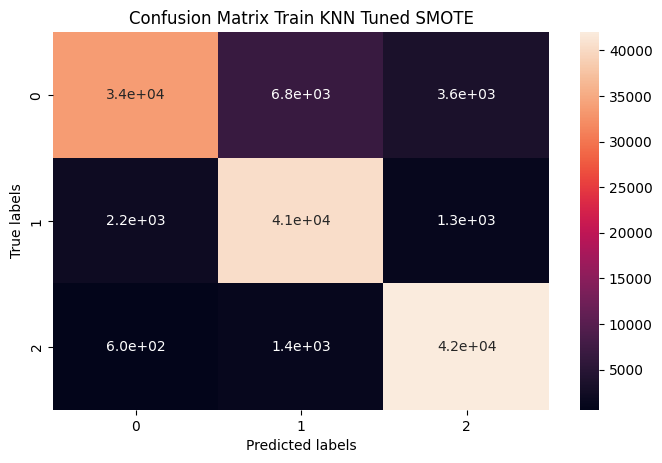

              precision    recall  f1-score   support

           0       0.92      0.77      0.84     43953
           1       0.83      0.92      0.88     43953
           2       0.90      0.96      0.93     43953

    accuracy                           0.88    131859
   macro avg       0.88      0.88      0.88    131859
weighted avg       0.88      0.88      0.88    131859

---------------Test data ---------------

Confusion matrix 

[[7572 2306 1110]
 [ 848  869  491]
 [ 152  188  135]]


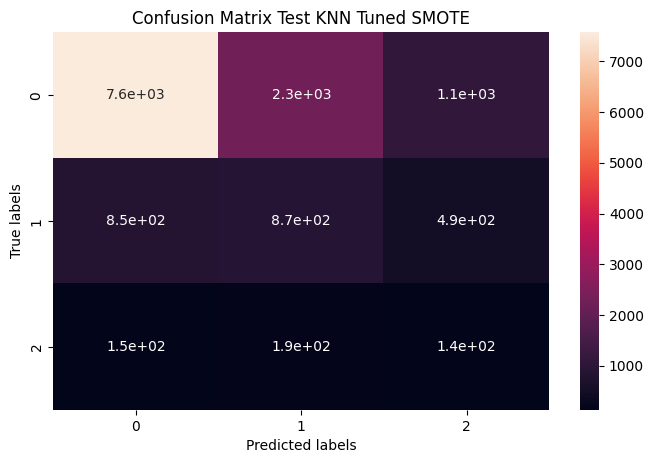

              precision    recall  f1-score   support

           0       0.88      0.69      0.77     10988
           1       0.26      0.39      0.31      2208
           2       0.08      0.28      0.12       475

    accuracy                           0.63     13671
   macro avg       0.41      0.46      0.40     13671
weighted avg       0.75      0.63      0.68     13671



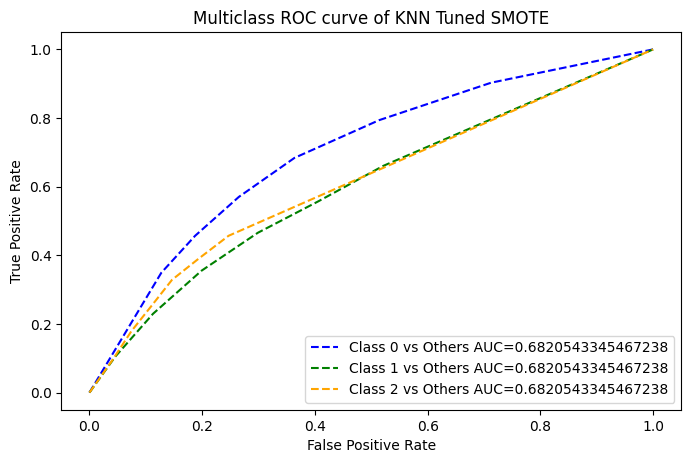

[{'Model_Name': 'KNN Tuned RUS',
  'Test_AUC': 0.7120568798168657,
  'Test_Accuracy': 0.5780118499012509,
  'Test_F1score': 0.645603496972498,
  'Test_Precision': 0.7695832996291636,
  'Test_Recall': 0.5780118499012509,
  'Train_AUC': 0.8181196963657232,
  'Train_Accuracy': 0.6243414120126449,
  'Train_F1score': 0.623237047408161,
  'Train_Precision': 0.6234362654846187,
  'Train_Recall': 0.6243414120126449},
 {'Model_Name': 'KNN Tuned SMOTE',
  'Test_AUC': 0.6820543345467238,
  'Test_Accuracy': 0.627313290907761,
  'Test_F1score': 0.6769157196720779,
  'Test_Precision': 0.754417249103387,
  'Test_Recall': 0.627313290907761,
  'Train_AUC': 0.9791208368560474,
  'Train_Accuracy': 0.880819663428359,
  'Train_F1score': 0.8791915206050119,
  'Train_Precision': 0.8846573457260328,
  'Train_Recall': 0.880819663428359}]

In [144]:
#knn tuned model evaluation
knn_tuned_eval_list = model_evaluation('KNN Tuned RUS', 'KNN Tuned SMOTE', knn_rus_tuned, knn_smote_tuned, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
knn_tuned_eval_list

In [145]:
#adding list
add_list_to_final_df(knn_tuned_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.541974,0.541974,0.532582,0.519821,0.722834,0.622120,0.622120,0.773710,0.679839,0.762724
1,LogisticReg SMOTE,0.535504,0.535504,0.520018,0.508887,0.720768,0.624095,0.624095,0.771182,0.680184,0.765254
2,Decision Tree RUS,0.999122,0.999122,0.999123,0.999122,0.999999,0.485261,0.485261,0.739374,0.566672,0.598845
3,Decision Tree SMOTE,0.999416,0.999416,0.999417,0.999416,1.000000,0.696950,0.696950,0.728753,0.711798,0.604265
4,Random Forest RUS,0.565332,0.565332,0.559548,0.542742,0.753785,0.628045,0.628045,0.775423,0.684171,0.763473
5,Random Forest SMOTE,0.557171,0.557171,0.537683,0.527010,0.758068,0.680418,0.680418,0.770521,0.715459,0.763436
6,RandomF Tuned RUS,0.744819,0.744819,0.748197,0.743932,0.913410,0.614805,0.614805,0.779785,0.676210,0.757659
7,RandomF Tuned SMOTE,0.906392,0.906392,0.906325,0.905792,0.983580,0.742740,0.742740,0.759656,0.750801,0.757324
8,KNN RUS,0.651914,0.651914,0.654008,0.650015,0.841923,0.585839,0.585839,0.759384,0.648853,0.696987
9,KNN SMOTE,0.881434,0.881434,0.889883,0.878809,0.983594,0.600249,0.600249,0.754318,0.656687,0.676938


####**XG Boost Model:**

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. The two reasons to use XGBoost are also the two goals of the project:
* Execution Speed.
* Model Performance.

In [146]:
#importing
from xgboost import XGBClassifier

In [147]:
#fitting rus
xgb_rus = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
xgb_rus.fit(x_train_rus,y_train_rus)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

In [148]:
#fitting smote
xgb_smote = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
xgb_smote.fit(x_train_smote,y_train_smote)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

----- Evaluation on Random Undersampled data -----XGB RUS------
--------------- Train Data ------------

Confusion matrix 

[[1883    2   13]
 [  16 1849   33]
 [   5    7 1886]]


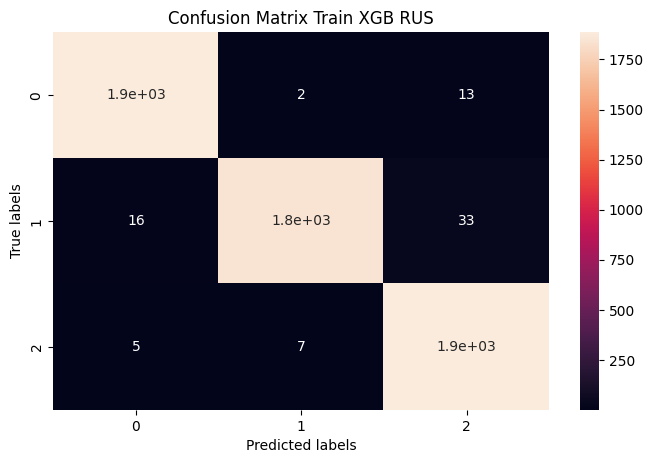

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1898
           1       1.00      0.97      0.98      1898
           2       0.98      0.99      0.98      1898

    accuracy                           0.99      5694
   macro avg       0.99      0.99      0.99      5694
weighted avg       0.99      0.99      0.99      5694

--------------Test data ---------------

Confusion matrix 

[[6779 2447 1762]
 [ 576  749  883]
 [  86  156  233]]


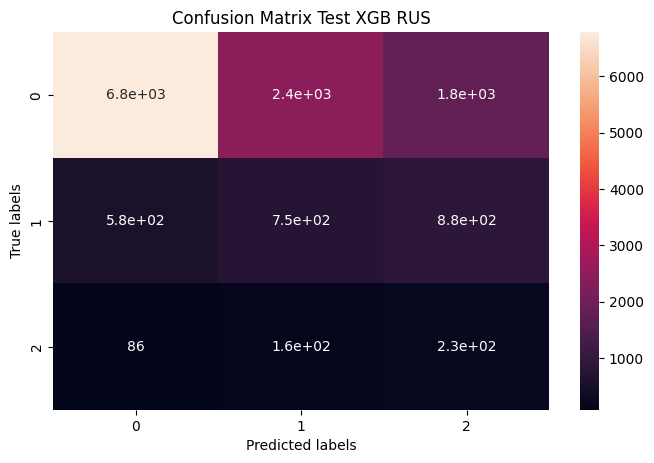

              precision    recall  f1-score   support

           0       0.91      0.62      0.74     10988
           1       0.22      0.34      0.27      2208
           2       0.08      0.49      0.14       475

    accuracy                           0.57     13671
   macro avg       0.41      0.48      0.38     13671
weighted avg       0.77      0.57      0.64     13671



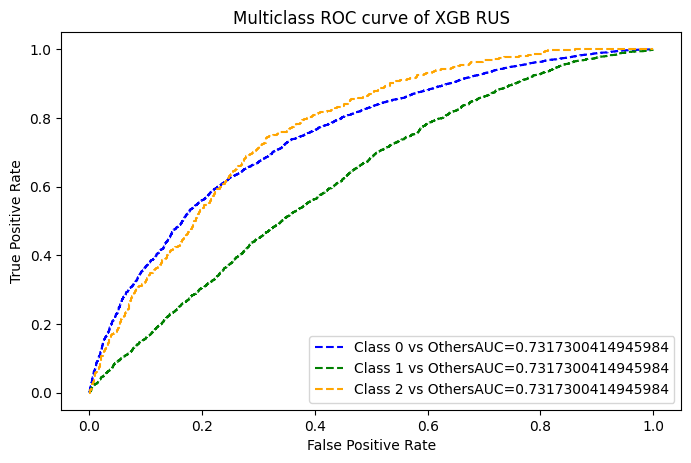

----- Evaluation on SMOTE data -------XGB SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[42850   857   246]
 [ 4227 35082  4644]
 [  786   876 42291]]


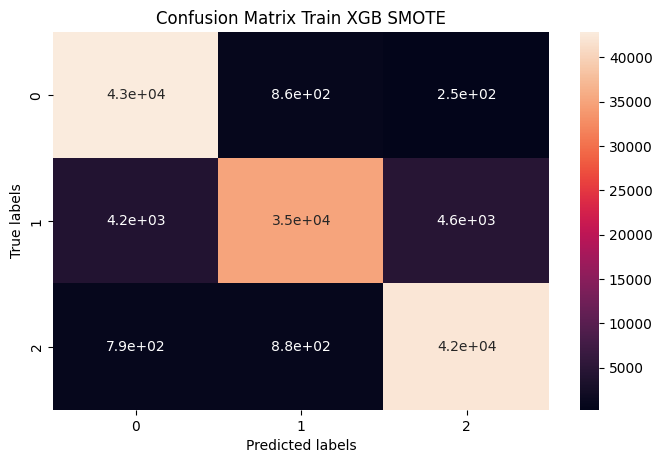

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     43953
           1       0.95      0.80      0.87     43953
           2       0.90      0.96      0.93     43953

    accuracy                           0.91    131859
   macro avg       0.91      0.91      0.91    131859
weighted avg       0.91      0.91      0.91    131859

---------------Test data ---------------

Confusion matrix 

[[10285   588   115]
 [ 1587   478   143]
 [  300   139    36]]


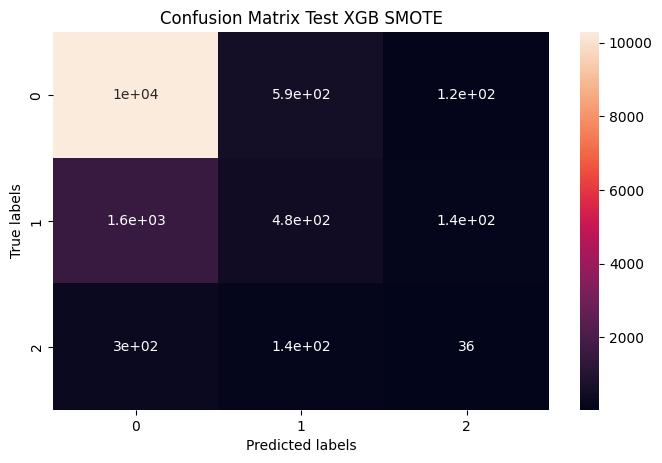

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     10988
           1       0.40      0.22      0.28      2208
           2       0.12      0.08      0.09       475

    accuracy                           0.79     13671
   macro avg       0.45      0.41      0.42     13671
weighted avg       0.75      0.79      0.76     13671



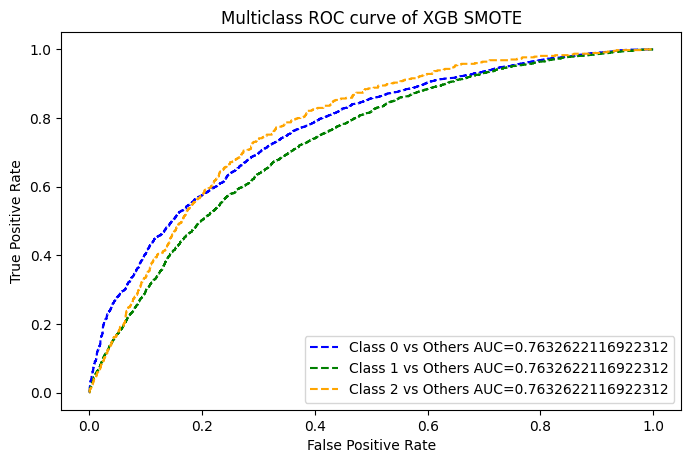

[{'Model_Name': 'XGB RUS',
  'Test_AUC': 0.7317300414945984,
  'Test_Accuracy': 0.5676980469607198,
  'Test_F1score': 0.6396494731848822,
  'Test_Precision': 0.7711408031941839,
  'Test_Recall': 0.5676980469607198,
  'Train_AUC': 0.9995195338076092,
  'Train_Accuracy': 0.9866526167896031,
  'Train_F1score': 0.986648578883858,
  'Train_Precision': 0.9867723820780556,
  'Train_Recall': 0.9866526167896031},
 {'Model_Name': 'XGB SMOTE',
  'Test_AUC': 0.7632622116922312,
  'Test_Accuracy': 0.789920269182942,
  'Test_F1score': 0.7623546221491548,
  'Test_Precision': 0.7474644778985376,
  'Test_Recall': 0.789920269182942,
  'Train_AUC': 0.9841138760763947,
  'Train_Accuracy': 0.9117542223132286,
  'Train_F1score': 0.910068254199571,
  'Train_Precision': 0.914848981706282,
  'Train_Recall': 0.9117542223132286}]

In [149]:
#model evaluation of XGB
xgb_eval_list = model_evaluation('XGB RUS', 'XGB SMOTE',xgb_rus, xgb_smote,x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
xgb_eval_list

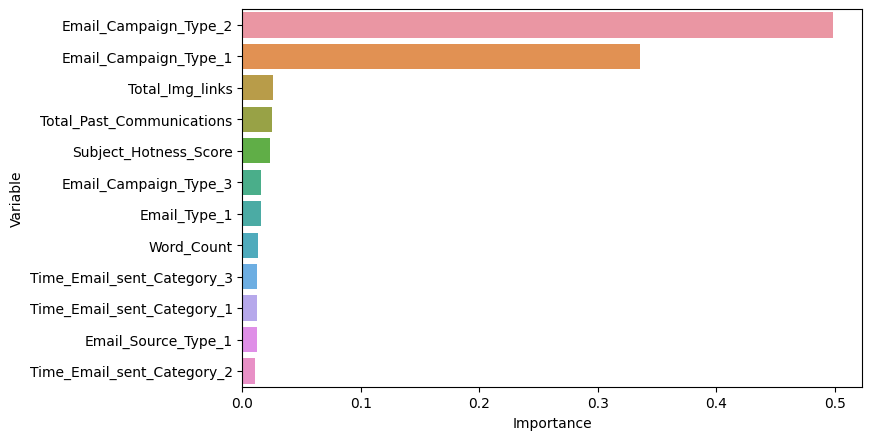

In [150]:
#visualising feature importance of XGB
feature_imp_xgb = pd.DataFrame({"Variable": x_train_smote.columns,"Importance": xgb_smote.feature_importances_})
feature_imp_xgb.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp_xgb['Importance'], y= feature_imp_xgb['Variable'])

In [151]:
#adding list
add_list_to_final_df(xgb_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.541974,0.541974,0.532582,0.519821,0.722834,0.622120,0.622120,0.773710,0.679839,0.762724
1,LogisticReg SMOTE,0.535504,0.535504,0.520018,0.508887,0.720768,0.624095,0.624095,0.771182,0.680184,0.765254
2,Decision Tree RUS,0.999122,0.999122,0.999123,0.999122,0.999999,0.485261,0.485261,0.739374,0.566672,0.598845
3,Decision Tree SMOTE,0.999416,0.999416,0.999417,0.999416,1.000000,0.696950,0.696950,0.728753,0.711798,0.604265
4,Random Forest RUS,0.565332,0.565332,0.559548,0.542742,0.753785,0.628045,0.628045,0.775423,0.684171,0.763473
5,Random Forest SMOTE,0.557171,0.557171,0.537683,0.527010,0.758068,0.680418,0.680418,0.770521,0.715459,0.763436
6,RandomF Tuned RUS,0.744819,0.744819,0.748197,0.743932,0.913410,0.614805,0.614805,0.779785,0.676210,0.757659
7,RandomF Tuned SMOTE,0.906392,0.906392,0.906325,0.905792,0.983580,0.742740,0.742740,0.759656,0.750801,0.757324
8,KNN RUS,0.651914,0.651914,0.654008,0.650015,0.841923,0.585839,0.585839,0.759384,0.648853,0.696987
9,KNN SMOTE,0.881434,0.881434,0.889883,0.878809,0.983594,0.600249,0.600249,0.754318,0.656687,0.676938


##**Conclusion:**


**Evaluation Metrics:**

There is a number of model evaluation metrics to choose from but since our dataset was highly imbalanced, it is critical to understand which metric should be evaluated to understand the model performance.

* Accuracy- Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions. Accuracy is useful when the target class is well balanced but is not a good choice for the unbalanced classes, because if the model poorly predicts every observation as of the majority class, we are going to get a pretty high accuracy.

* Confusion Matrix - It is a performance measurement criteria for the machine learning classification problems where we get a table with a combination of predicted and actual values.

* Precision - Precision for a label is defined as the number of true positives divided by the number of predicted positives.

* Recall - Recall for a label is defined as the number of true positives divided by the total number of actual positives. Recall explains how many of the actual positive cases we were able to predict correctly with our model.

* F1 Score - It's actually the harmonic mean of Precision and Recall. It is maximum when Precision is equal to Recall.

* AUC ROC - The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes. When AUC is 0.5, the classifier is not able to distinguish between the classes and when it's closer to 1,the more good it becomes in distingushing them.


**So among all the above metrics, which metric should be prioritised in comparing the performance of our various models? That's the major question here as we have a multiclass classification problem, where the problem statement just asks us to track and classify between ignored, read and acknowledged classes, we can not decide here what we want to prioritise in terms of classification, we just want to correctly classify and characterize accordingly. On top of that our data is highly imbalanced, which we tried to encounter in the ways possible.**

**When we have a high class imbalance, we'll choose the F1 score because a high F1 score considers both precision and recall. To get a high F1, both false positives and false negatives must be low. The F1 score depends on how highly imbalanced our dataset is!**

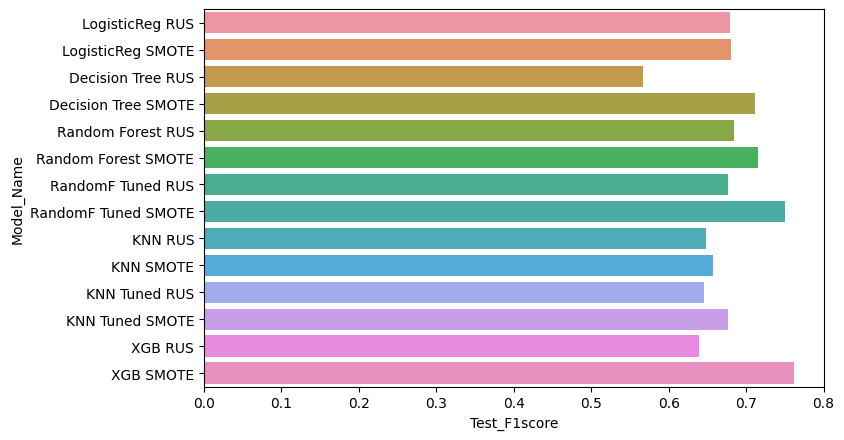

In [152]:
#visualising our comparison df for f1 score
sns.barplot(y=comparison_df['Model_Name'], x = comparison_df['Test_F1score'])

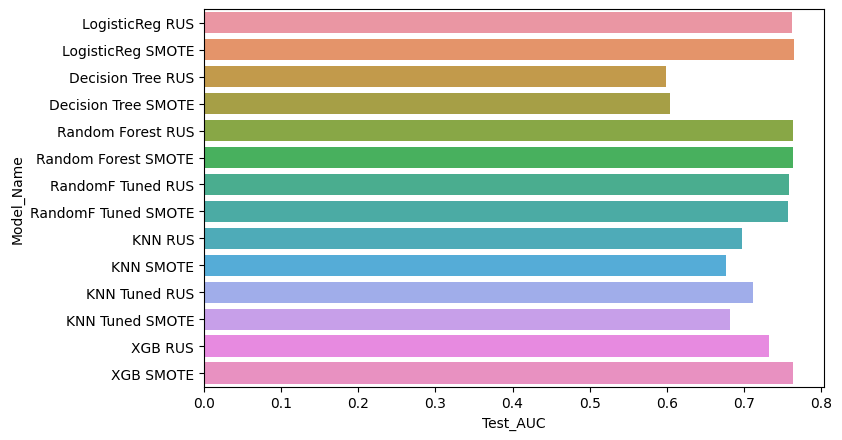

In [153]:
#visualising for auc
sns.barplot(y=comparison_df['Model_Name'], x = comparison_df['Test_AUC'])

In [154]:
#sorting values
comparison_df.sort_values(by=["Test_F1score",'Test_AUC'], ascending=(False,False), inplace = True, ignore_index = True)
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,XGB SMOTE,0.911754,0.911754,0.914849,0.910068,0.984114,0.789920,0.789920,0.747464,0.762355,0.763262
1,RandomF Tuned SMOTE,0.906392,0.906392,0.906325,0.905792,0.983580,0.742740,0.742740,0.759656,0.750801,0.757324
2,Random Forest SMOTE,0.557171,0.557171,0.537683,0.527010,0.758068,0.680418,0.680418,0.770521,0.715459,0.763436
3,Decision Tree SMOTE,0.999416,0.999416,0.999417,0.999416,1.000000,0.696950,0.696950,0.728753,0.711798,0.604265
4,Random Forest RUS,0.565332,0.565332,0.559548,0.542742,0.753785,0.628045,0.628045,0.775423,0.684171,0.763473
5,LogisticReg SMOTE,0.535504,0.535504,0.520018,0.508887,0.720768,0.624095,0.624095,0.771182,0.680184,0.765254
6,LogisticReg RUS,0.541974,0.541974,0.532582,0.519821,0.722834,0.622120,0.622120,0.773710,0.679839,0.762724
7,KNN Tuned SMOTE,0.880820,0.880820,0.884657,0.879192,0.979121,0.627313,0.627313,0.754417,0.676916,0.682054
8,RandomF Tuned RUS,0.744819,0.744819,0.748197,0.743932,0.913410,0.614805,0.614805,0.779785,0.676210,0.757659
9,KNN SMOTE,0.881434,0.881434,0.889883,0.878809,0.983594,0.600249,0.600249,0.754318,0.656687,0.676938


**Observation:**

Exploratory Data Analysis:

* In the customer location feature we can find that irrespective of the location, the percentage ratio of emails being ignored, read and acknowledged are kind of similar. It does not exclusively influence our target variable. It would be better to not consider location as a factor in people ignoring, reading or acknowledging our emails. 

* In the Email Campaign Type feature, it seems like in campaign type 1 very few emails were sent but has a very high likelihood of getting read. Most emails were sent under email campaign type 2 and most ignored. Seems like campaign 3 was a success as even when less number of emails were sent under campaign 3, more emails were read and acknowledged.

* Time email sent category cannot be considered as a relevant factor in classifying the emails. Both the feature importance showed this particular thing. If we consider Time email sent category 2 as middle of the of course they are going to be read and acknowledged more than morning and night.

* Analyzing total past communications, we can see that the more the number of previous emails, the more it leads to read and acknowledged emails. This is just about making connection with your customers.

* The more the words in an email, the more it has a tendency it has to get ignored. Too lengthy emails are getting ignored.

* More images were there in ignored emails.
* There are outliers in almost every continuous variable except Word Count and upon analyzing, it was found that outliers make up for more than 5% of the minority data and will influence the results either way, so it was better not to get rid of them.

Modeling:
* Imbalanced Class Handling techniques such as Undersampling and SMOTE were done after train-test split only on the training data, to make sure that the model doesn't catch up to the test set at all and it remains unknown which somewhat reduced our results.
* It is observed that SMOTE worked considerably better than Random Undersampling, it may have led to loss of information.
* Decision Tree Model is overfitting. It is working really great on train data and worse on test data.
* Hyperparameter tuning isn't improving the results to a great degree.
* XGBoost Algorithm worked in the best way possible with such imbalanced data with outliers, followed by Random Forest Hyperparameter Tuned model.


Recommendations:

Upon this in-depth exploratory data analysis and feature importance of various good models, we came to a conclusion and mentioned some factors that are leading to a higher number of ignored emails and accordingly here are some recommendations. 
* Email Campaign Type 1 and 3 are doing better than 2. So, focusing on improving 2, can do the trick.
* The word count should be reasonable. The content should be crisp and to the point with a few marketing gimmicks.
* The number of images and links should be kept in check.
* Total past communications had a positive influence, hence having a healthy relationship with customers is a big yes.
